# Kmeans-clustering-for-depression-patients

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# dataframe이 잘리지 않고 다 보이도록 하는 옵션
pd.options.display.max_columns = 100

In [3]:
# 글씨체 선명하게 출력
from IPython.display import set_matplotlib_formats

mpl.rc('font', family = 'Malgun Gothic')
mpl.rc('axes', unicode_minus = True)
set_matplotlib_formats('retina')
plt.rcParams['font.family'] = 'Malgun Gothic'

## 1. Load Data

In [4]:
df1 = pd.read_csv('data3.csv')
print(df1.shape)
df1.head()

(7380, 30)


,ID,age,성별,가구원수,기초생활수급여부,주택형태,월평균가구총소득(만원),결혼여부,결혼상태,주관적건강상태,2주내몸이상여부(주관적),고혈압진단여부,이상지지혈증진단여부,우울증진단여부,우울증진단시기,우을중현재유병여부,우울증치료,활동제한여부,활동제한사유,불안우울설문,경제활동상태,미취업사유,하루평균수면시간,평소스트레스인지정도,2주이상우울감여부,1년간정신문제상담,1년간자살생각여부,1년간자살계획여부,1년간자살시도여부,당뇨병진단여부
0,A701229702,43,여성,4,수급경험없음,다세대주택,275.000000,기혼,동거,나쁨,예,없음,없음,없음,NaN,비해당(청소년/소아),비해당(청소년/소아),2.0,비해당,불안하거나우울하지않음,취업자,비해당(청소년),7.0,조금느낌,아니오,아니오,아니오,아니오,아니오,없음
1,A701229704,10,남성,4,수급경험없음,다세대주택,275.000000,미혼,모름,무응답,무응답,무응답,무응답,무응답,NaN,무응답,무응답,NaN,무응답,무응답,무응답,무응답,NaN,무응답,무응답,무응답,무응답,무응답,무응답,무응답
2,A701241801,61,여성,2,수급경험없음,단독주택,125.000000,기혼,이혼,나쁨,아니오,없음,없음,없음,NaN,비해당(청소년/소아),비해당(청소년/소아),2.0,비해당,불안하거나우울하지않음,실업자(비경제인구),실업/구직,8.0,조금느낌,예,아니오,아니오,아니오,아니오,없음
3,A701241802,35,남성,2,수급경험없음,단독주택,125.000000,미혼,모름,보통,아니오,없음,없음,없음,NaN,비해당(청소년/소아),비해당(청소년/소아),2.0,비해당,불안하거나우울하지않음,취업자,비해당(청소년),8.0,많이느낌,아니오,아니오,아니오,아니오,아니오,없음
4,A701261901,20,남성,1,수급경험없음,단독주택,43.333333,미혼,모름,좋음,예,없음,없음,없음,NaN,비해당(청소년/소아),비해당(청소년/소아),2.0,비해당,불안하거나우울하지않음,실업자(비경제인구),학원/학교재학,6.0,많이느낌,아니오,아니오,아니오,아니오,아니오,없음


In [5]:
df1.describe()

,age,가구원수,월평균가구총소득(만원),우울증진단시기,활동제한여부,하루평균수면시간
count,7380.000000,7380.000000,7328.000000,250.000000,6904.000000,5931.000000
mean,43.462331,3.197696,388.995224,47.528000,2.405417,6.762435
std,22.613010,1.269838,294.535101,15.694921,1.794055,1.395746
min,1.000000,1.000000,17.000000,14.000000,1.000000,1.000000
25%,24.000000,2.000000,166.666667,35.000000,2.000000,6.000000
50%,46.000000,3.000000,330.000000,50.000000,2.000000,7.000000
75%,62.000000,4.000000,540.000000,59.000000,2.000000,8.000000
max,80.000000,6.000000,1500.000000,78.000000,9.000000,14.000000


## 2. Data Preprocessing

### Replace missing values

In [6]:
df1.isnull().sum()

ID                  0
age                 0
성별                  0
가구원수                0
기초생활수급여부            0
주택형태                0
월평균가구총소득(만원)       52
결혼여부                0
결혼상태                0
주관적건강상태             0
2주내몸이상여부(주관적)       0
고혈압진단여부             0
이상지지혈증진단여부          0
우울증진단여부             0
우울증진단시기          7130
우을중현재유병여부           0
우울증치료               0
활동제한여부            476
활동제한사유              0
불안우울설문              0
경제활동상태              0
미취업사유               0
하루평균수면시간         1449
평소스트레스인지정도          0
2주이상우울감여부           0
1년간정신문제상담           0
1년간자살생각여부           0
1년간자살계획여부           0
1년간자살시도여부           0
당뇨병진단여부             0
dtype: int64

#### 1) 월평균가구총소득(만원) 결측치 처리

In [7]:
df1['기초생활수급여부'].value_counts()

수급경험없음    6795
수급경험있음     580
무응답          5
Name: 기초생활수급여부, dtype: int64

In [8]:
a1 = df1[df1['기초생활수급여부']=='수급경험없음']
a2 = df1[df1['기초생활수급여부']=='수급경험있음']
print('수급경험없음:', a1['월평균가구총소득(만원)'].mean())
print('수급경험있음:', a2['월평균가구총소득(만원)'].mean())

수급경험없음: 410.14476218685024
수급경험있음: 142.54050925911466


기초생활수급여부에 따라 월평균가구총소득 결측치를 해당 평균으로 대체한다.

In [9]:
df1['월평균가구총소득(만원)'].fillna('nan', inplace=True)

In [10]:
for i in range(0, len(df1)) :
    if df1.loc[i, '월평균가구총소득(만원)'] == 'nan' :
        if df1.loc[i, '기초생활수급여부'] == '수급경험없음' :
            df1.loc[i, '월평균가구총소득(만원)'] = 410.144
            
        elif df1.loc[i, '기초생활수급여부'] == '수급경험있음' :
            df1.loc[i, '월평균가구총소득(만원)'] =  142.540
            
        elif df1.loc[i, '기초생활수급여부'] == '무응답' :
            df1.loc[i, '월평균가구총소득(만원)'] = 388.995  # 월평균가구총소득(만원) 변수의 전체 평균

    else :
        continue

#### 2) 우울증진단시기 결측치 처리

In [11]:
df1['우울증진단시기'].value_counts()

50.0    9
35.0    9
54.0    9
55.0    8
58.0    8
       ..
17.0    1
25.0    1
46.0    1
29.0    1
74.0    1
Name: 우울증진단시기, Length: 64, dtype: int64

In [12]:
df1[['우울증진단여부', '우울증진단시기']]

,우울증진단여부,우울증진단시기
0,없음,NaN
1,무응답,NaN
2,없음,NaN
3,없음,NaN
4,없음,NaN
...,...,...
7375,없음,NaN
7376,없음,NaN
7377,있음,28.0
7378,없음,NaN


In [13]:
b1 = df1[df1['우울증진단여부']=='없음']
b2 = df1[df1['우울증진단여부']=='있음']
b3 = df1[df1['우울증진단여부']=='무응답']

In [14]:
# 우울증진단여부가 '없음', '무응답'인 경우, 우울증진단시기가 전부 결측값으로 되어있으므로 0으로 대체한다.
print(b1.shape)
print(b1['우울증진단시기'].isnull().sum())

print(b3.shape)
print(b3['우울증진단시기'].isnull().sum())

(4868, 30)
4868
(926, 30)
926


In [15]:
df1['우울증진단시기'].fillna(0, inplace=True)

In [16]:
# 우울증진단여부가 '있음'이지만, 우울증진단시기가 결측값으로 되어있는 경우에는 age에서 5를 뺀 값으로 대체한다.
print(b2['우울증진단시기'].isnull().sum())

3


In [17]:
b2[['age', '우울증진단시기']].head(10)

,age,우울증진단시기
17,62,55.0
91,78,61.0
129,67,64.0
148,75,58.0
161,68,62.0
168,68,66.0
173,77,73.0
195,52,50.0
197,28,24.0
203,40,35.0


In [18]:
for i in range(0, len(df1)) :
    if df1.loc[i, '우울증진단시기'] == 0 :
        if df1.loc[i, '우울증진단여부'] == '있음' :
            df1.loc[i, '우울증진단시기'] = df1.loc[i, 'age']-5
    else :
        continue

#### 3) 활동제한여부 결측치 처리

In [19]:
df1['활동제한여부'].value_counts()

2.0    5967
1.0     470
9.0     467
Name: 활동제한여부, dtype: int64

In [20]:
df1['활동제한사유'].value_counts()

비해당    5967
무응답     943
아니오     413
예        57
Name: 활동제한사유, dtype: int64

In [21]:
c_2 = df1[df1['활동제한여부']==2.0]
c_1 = df1[df1['활동제한여부']==1.0]
c_9 = df1[df1['활동제한여부']==9.0]

In [22]:
print('--활동제한여부 2.0-- \n', c_2['활동제한사유'].value_counts())
print('\n--활동제한여부 1.0-- \n', c_1['활동제한사유'].value_counts())
print('\n--활동제한여부 9.0-- \n', c_9['활동제한사유'].value_counts())

--활동제한여부 2.0-- 
 비해당    5967
Name: 활동제한사유, dtype: int64

--활동제한여부 1.0-- 
 아니오    413
예       57
Name: 활동제한사유, dtype: int64

--활동제한여부 9.0-- 
 무응답    467
Name: 활동제한사유, dtype: int64


In [23]:
df1['활동제한여부'].fillna(0, inplace=True)

In [24]:
for i in range(0, len(df1)) :
    if df1.loc[i, '활동제한여부'] == 0 :
        if df1.loc[i, '활동제한사유'] == '비해당' :
            df1.loc[i, '활동제한여부'] = 2.0
        
        elif df1.loc[i, '활동제한사유'] == '아니요' :
            df1.loc[i, '활동제한여부'] = 1.0
            
        elif df1.loc[i, '활동제한사유'] == '예' :
            df1.loc[i, '활동제한여부'] = 1.0
            
        elif df1.loc[i, '활동제한사유'] == '무응답' :
            df1.loc[i, '활동제한여부'] = 9.0
            
    else :
        continue

#### 4) 하루평균수면시간 결측치 처리

In [25]:
df1.columns

Index(['ID', 'age', '성별', '가구원수', '기초생활수급여부', '주택형태', '월평균가구총소득(만원)', '결혼여부',
       '결혼상태', '주관적건강상태', '2주내몸이상여부(주관적)', '고혈압진단여부', '이상지지혈증진단여부', '우울증진단여부',
       '우울증진단시기', '우을중현재유병여부', '우울증치료', '활동제한여부', '활동제한사유', '불안우울설문', '경제활동상태',
       '미취업사유', '하루평균수면시간', '평소스트레스인지정도', '2주이상우울감여부', '1년간정신문제상담',
       '1년간자살생각여부', '1년간자살계획여부', '1년간자살시도여부', '당뇨병진단여부'],
      dtype='object')

In [26]:
df1['하루평균수면시간'].fillna(df1['하루평균수면시간'].mean(), inplace=True)

### Label Encoding

In [27]:
df1['활동제한여부'].value_counts()

2.0    5967
9.0     943
1.0     470
Name: 활동제한여부, dtype: int64

In [28]:
print(df1['활동제한여부'].dtypes)
df1['활동제한여부'] = df1['활동제한여부'].astype('object')
print(df1['활동제한여부'].dtypes)

float64
object


In [29]:
obj_cols = df1.select_dtypes('object').columns   # object 변수만 확인
print('object column: ', obj_cols)

object column:  Index(['ID', '성별', '기초생활수급여부', '주택형태', '월평균가구총소득(만원)', '결혼여부', '결혼상태',
       '주관적건강상태', '2주내몸이상여부(주관적)', '고혈압진단여부', '이상지지혈증진단여부', '우울증진단여부',
       '우을중현재유병여부', '우울증치료', '활동제한여부', '활동제한사유', '불안우울설문', '경제활동상태', '미취업사유',
       '평소스트레스인지정도', '2주이상우울감여부', '1년간정신문제상담', '1년간자살생각여부', '1년간자살계획여부',
       '1년간자살시도여부', '당뇨병진단여부'],
      dtype='object')


In [30]:
df1.columns

Index(['ID', 'age', '성별', '가구원수', '기초생활수급여부', '주택형태', '월평균가구총소득(만원)', '결혼여부',
       '결혼상태', '주관적건강상태', '2주내몸이상여부(주관적)', '고혈압진단여부', '이상지지혈증진단여부', '우울증진단여부',
       '우울증진단시기', '우을중현재유병여부', '우울증치료', '활동제한여부', '활동제한사유', '불안우울설문', '경제활동상태',
       '미취업사유', '하루평균수면시간', '평소스트레스인지정도', '2주이상우울감여부', '1년간정신문제상담',
       '1년간자살생각여부', '1년간자살계획여부', '1년간자살시도여부', '당뇨병진단여부'],
      dtype='object')

In [31]:
df1.rename(columns = {"우을중현재유병여부": "우울증현재유병여부"}, inplace = True)

In [32]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df1['성별'] = labelencoder.fit_transform(df1['성별'])
df1['기초생활수급여부'] = labelencoder.fit_transform(df1['기초생활수급여부'])
df1['주택형태'] = labelencoder.fit_transform(df1['주택형태'])
df1['결혼여부'] = labelencoder.fit_transform(df1['결혼여부'])
df1['결혼상태'] = labelencoder.fit_transform(df1['결혼상태'])
df1['주관적건강상태'] = labelencoder.fit_transform(df1['주관적건강상태'])
df1['2주내몸이상여부(주관적)'] = labelencoder.fit_transform(df1['2주내몸이상여부(주관적)'])
df1['고혈압진단여부'] = labelencoder.fit_transform(df1['고혈압진단여부'])
df1['이상지지혈증진단여부'] = labelencoder.fit_transform(df1['이상지지혈증진단여부'])
df1['우울증진단여부'] = labelencoder.fit_transform(df1['우울증진단여부'])
df1['우울증현재유병여부'] = labelencoder.fit_transform(df1['우울증현재유병여부'])
df1['우울증치료'] = labelencoder.fit_transform(df1['우울증치료'])
df1['활동제한여부'] = labelencoder.fit_transform(df1['활동제한여부'])
df1['활동제한사유'] = labelencoder.fit_transform(df1['활동제한사유'])
df1['불안우울설문'] = labelencoder.fit_transform(df1['불안우울설문'])
df1['경제활동상태'] = labelencoder.fit_transform(df1['경제활동상태'])
df1['미취업사유'] = labelencoder.fit_transform(df1['미취업사유'])
df1['평소스트레스인지정도'] = labelencoder.fit_transform(df1['평소스트레스인지정도'])
df1['2주이상우울감여부'] = labelencoder.fit_transform(df1['2주이상우울감여부'])
df1['1년간정신문제상담'] = labelencoder.fit_transform(df1['1년간정신문제상담'])
df1['1년간자살생각여부'] = labelencoder.fit_transform(df1['1년간자살생각여부'])
df1['1년간자살계획여부'] = labelencoder.fit_transform(df1['1년간자살계획여부'])
df1['1년간자살시도여부'] = labelencoder.fit_transform(df1['1년간자살시도여부'])
df1['당뇨병진단여부'] = labelencoder.fit_transform(df1['당뇨병진단여부'])

### Deal with Outliers (Data 범위 95% 기준)

In [33]:
# 그래프 시각화 옵션 설정 함수 
%matplotlib inline

# 그래프 한글설정
mpl.rc('font',family = "Malgun Gothic")

#그래프의 한글을 더욱 선명하게 출력
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

#### 1) age 이상치 처리

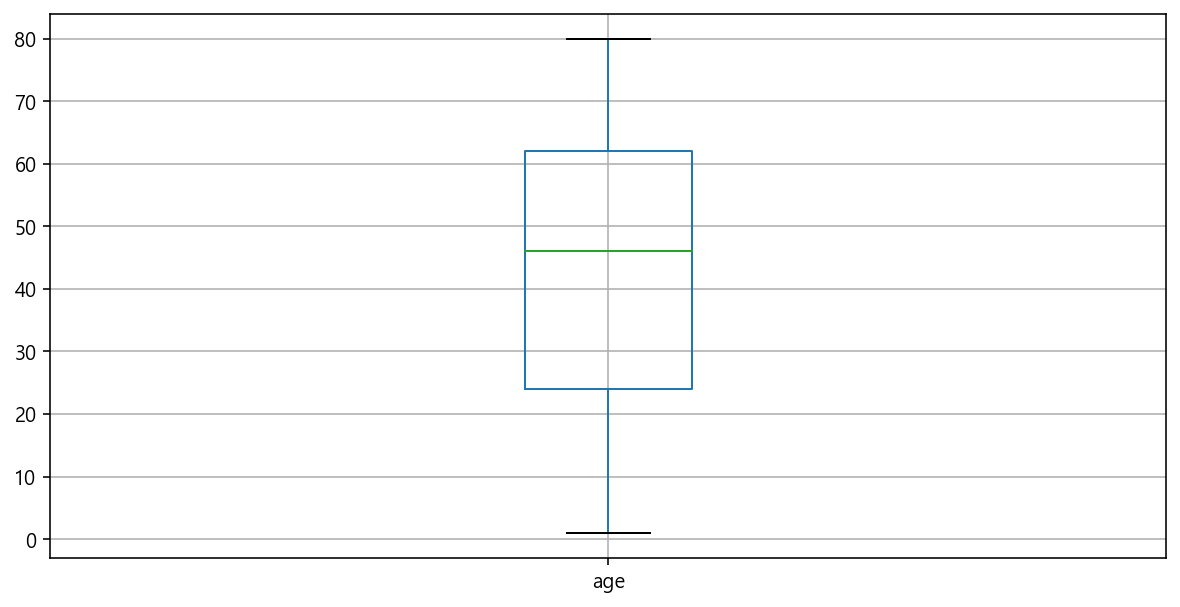

In [34]:
df1.boxplot(column = 'age', figsize=(10,5))

In [35]:
age_95 = np.percentile(df1['age'], 95)
print('age 95%:', age_95)
age_5 = np.percentile(df1['age'], 5)
print('age 5%:', age_5)

age 95%: 78.0
age 5%: 5.0


In [36]:
age_outlier1 = df1[df1['age'] >= age_95]
age_outlier2 = df1[df1['age'] <= age_5]
print(age_outlier1.shape)
print(age_outlier2.shape)

(379, 30)
(371, 30)


In [37]:
for i in range(0, len(df1)) :
    if df1.loc[i, 'age'] >= age_95 :
        df1.loc[i, 'age'] = 77
        
    elif df1.loc[i, 'age'] <= age_5 :
        df1.loc[i, 'age'] = 6 
            
    else :
        continue

#### 2) 가구원수 이상치 처리

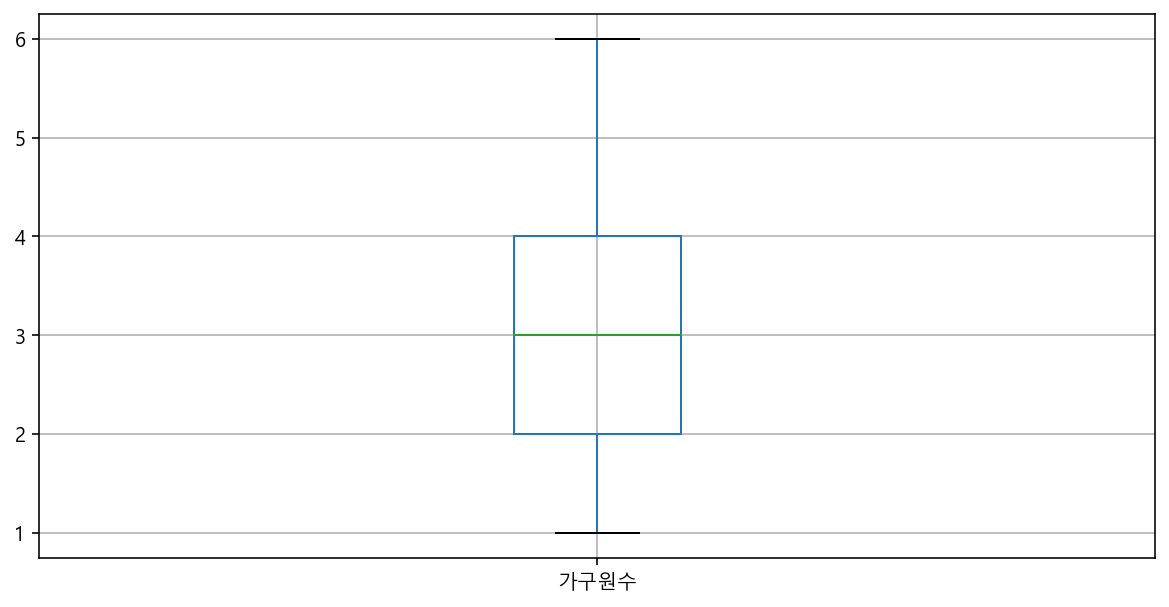

In [38]:
df1.boxplot(column = '가구원수', figsize=(10,5))

In [39]:
h_95 = np.percentile(df1['가구원수'], 95)
print('가구원수 95%:', h_95)
h_5 = np.percentile(df1['가구원수'], 5)
print('가구원수 5%:', h_5)

가구원수 95%: 5.0
가구원수 5%: 1.0


In [40]:
h_outlier1 = df1[df1['가구원수'] >= h_95]
h_outlier2 = df1[df1['가구원수'] <= h_5]
print(h_outlier1.shape)
print(h_outlier2.shape)

(1047, 30)
(600, 30)


In [41]:
for i in range(0, len(df1)) :
    if df1.loc[i, '가구원수'] >= h_95 :
        df1.loc[i, '가구원수'] = h_95
        
    elif df1.loc[i, '가구원수'] <= h_5 :
        df1.loc[i, '가구원수'] = h_5 
            
    else :
        continue

#### 3) 월평균가구총소득(만원) 이상치 처리

In [42]:
df1['월평균가구총소득(만원)'] = df1['월평균가구총소득(만원)'].astype('float')

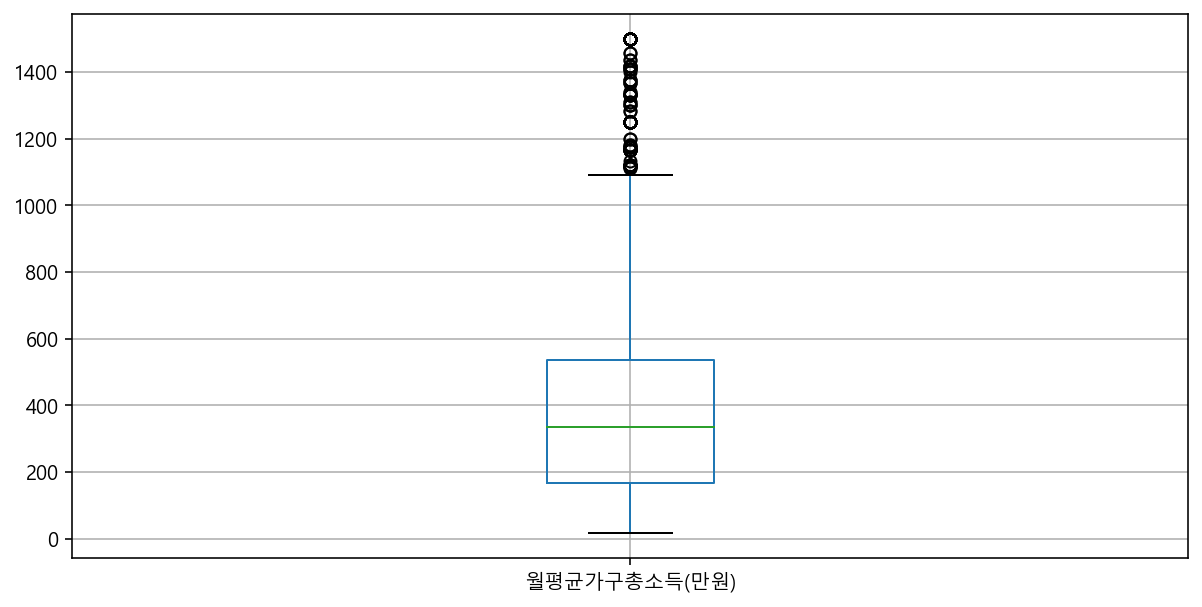

In [43]:
df1.boxplot(column = '월평균가구총소득(만원)', figsize=(10,5))

In [44]:
r_95 = np.percentile(df1['월평균가구총소득(만원)'], 95)
print('월평균가구총소득(만원) 95%:', r_95)
r_5 = np.percentile(df1['월평균가구총소득(만원)'], 5)
print('월평균가구총소득(만원) 5%:', r_5)

월평균가구총소득(만원) 95%: 955.0
월평균가구총소득(만원) 5%: 45.0


In [45]:
r_outlier1 = df1[df1['월평균가구총소득(만원)'] >= r_95]
r_outlier2 = df1[df1['월평균가구총소득(만원)'] <= r_5]
print(r_outlier1.shape)
print(r_outlier2.shape)

(372, 30)
(374, 30)


In [46]:
for i in range(0, len(df1)) :
    if df1.loc[i, '월평균가구총소득(만원)'] >= r_95 :
        df1.loc[i, '월평균가구총소득(만원)'] = r_95
        
    elif df1.loc[i, '월평균가구총소득(만원)'] <= r_5 :
        df1.loc[i, '월평균가구총소득(만원)'] = r_5 
            
    else :
        continue

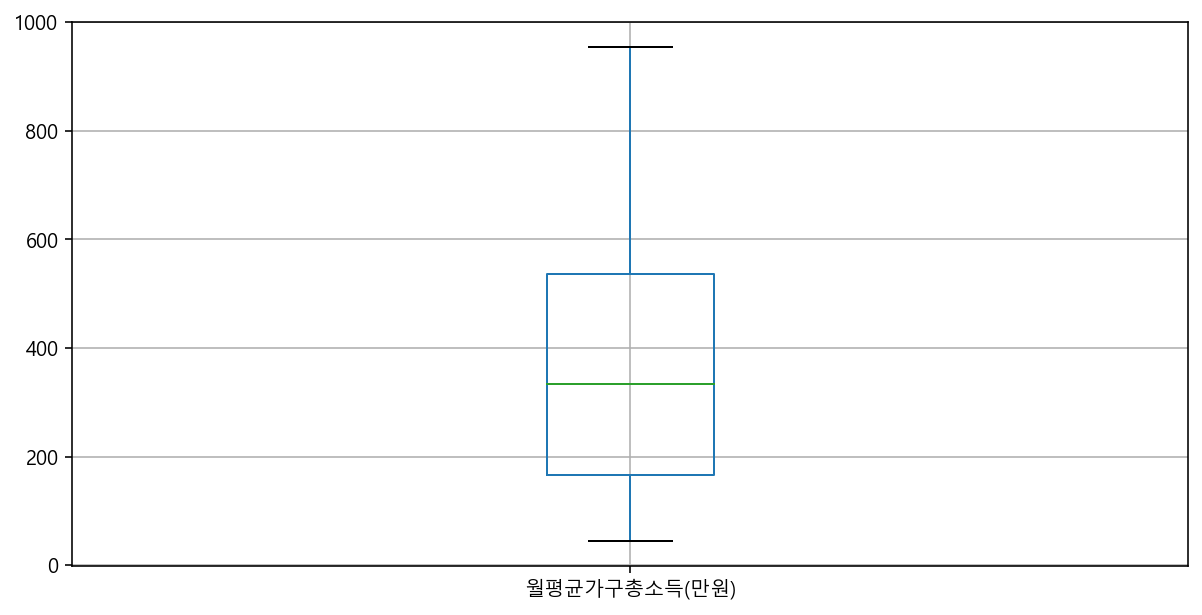

In [47]:
df1.boxplot(column = '월평균가구총소득(만원)', figsize=(10,5))

#### 4) 우울증진단시기 이상치 처리

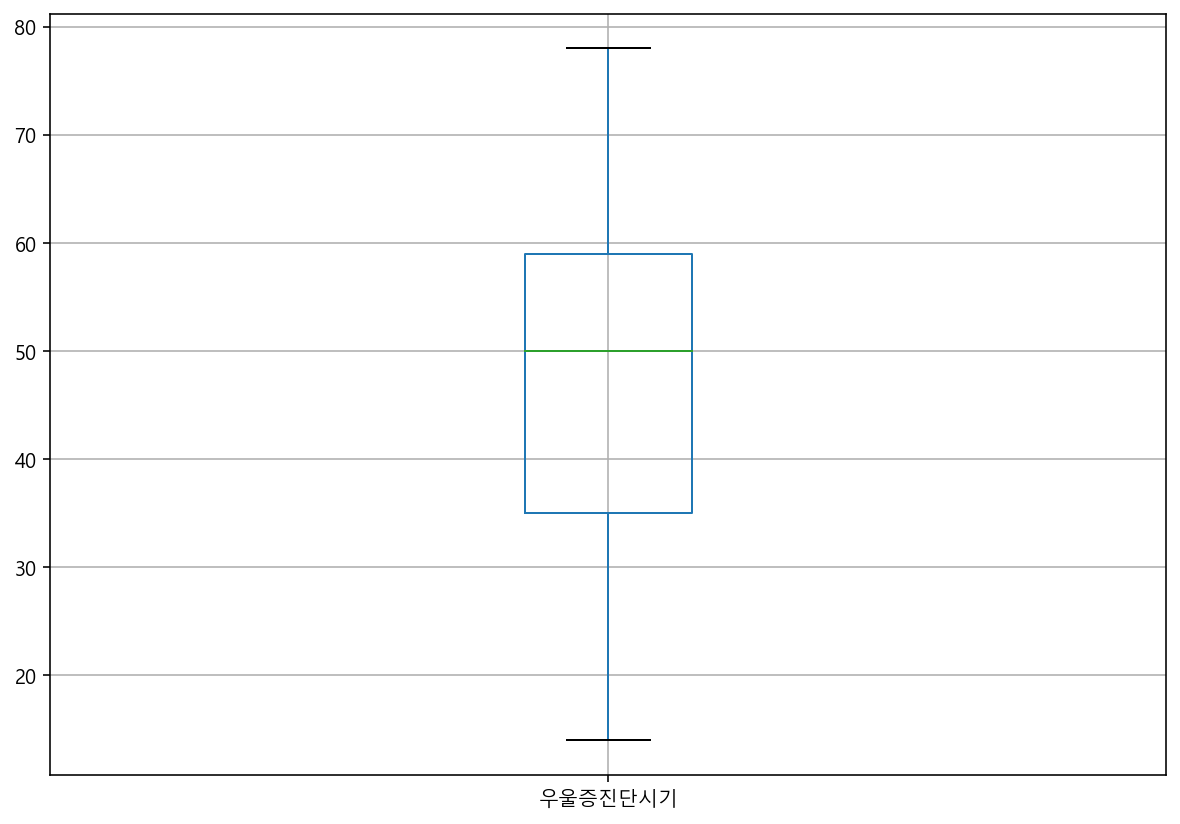

In [48]:
# 우울증진단시기가 0이 아닌 경우
df1_only = df1[df1['우울증진단시기']!=0]

df1_only.boxplot(column = '우울증진단시기', figsize=(10,7))

In [49]:
m_95 = np.percentile(df1_only['우울증진단시기'], 95)
print('우울증진단시기 95%:', m_95)
m_5 = np.percentile(df1_only['우울증진단시기'], 5)
print('우울증진단시기 5%:', m_5)

우울증진단시기 95%: 71.39999999999998
우울증진단시기 5%: 20.0


In [50]:
for i in range(0, len(df1)) :
    if df1.loc[i, '우울증진단시기'] != 0 :
        if df1.loc[i, '우울증진단시기'] >= m_95 :
            df1.loc[i, '우울증진단시기'] = m_95
        
        elif df1.loc[i, '우울증진단시기'] <= m_5 :
            df1.loc[i, '우울증진단시기'] = m_5 
            
    else :
        continue

#### 5) 하루평균수면시간 이상치 처리

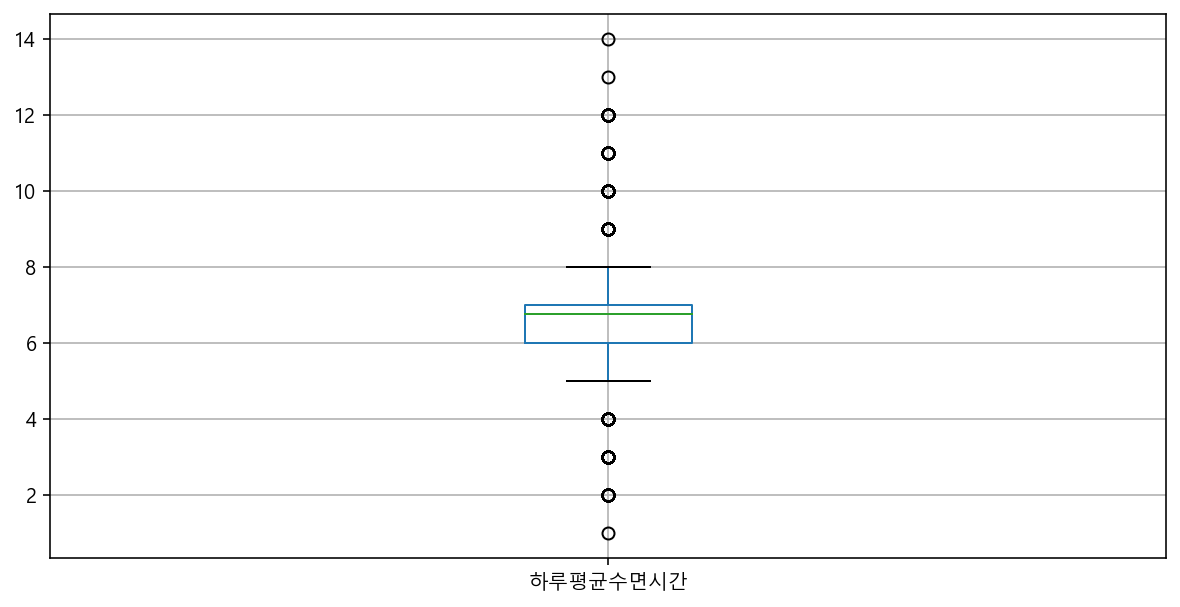

In [51]:
df1.boxplot(column = '하루평균수면시간', figsize=(10,5))

In [52]:
s_95 = np.percentile(df1['하루평균수면시간'], 95)
print('우울증진단시기 95%:', s_95)
s_5 = np.percentile(df1['하루평균수면시간'], 5)
print('우울증진단시기 5%:', s_5)

우울증진단시기 95%: 9.0
우울증진단시기 5%: 5.0


In [53]:
s_outlier1 = df1[df1['하루평균수면시간'] >= s_95]
s_outlier2 = df1[df1['하루평균수면시간'] <= s_5]
print(s_outlier1.shape)
print(s_outlier2.shape)

(490, 30)
(954, 30)


In [54]:
for i in range(0, len(df1)) :
    if df1.loc[i, '하루평균수면시간'] >= s_95 :
        df1.loc[i, '하루평균수면시간'] = s_95
        
    elif df1.loc[i, '하루평균수면시간'] <= s_5 :
        df1.loc[i, '하루평균수면시간'] = s_5 
            
    else :
        continue

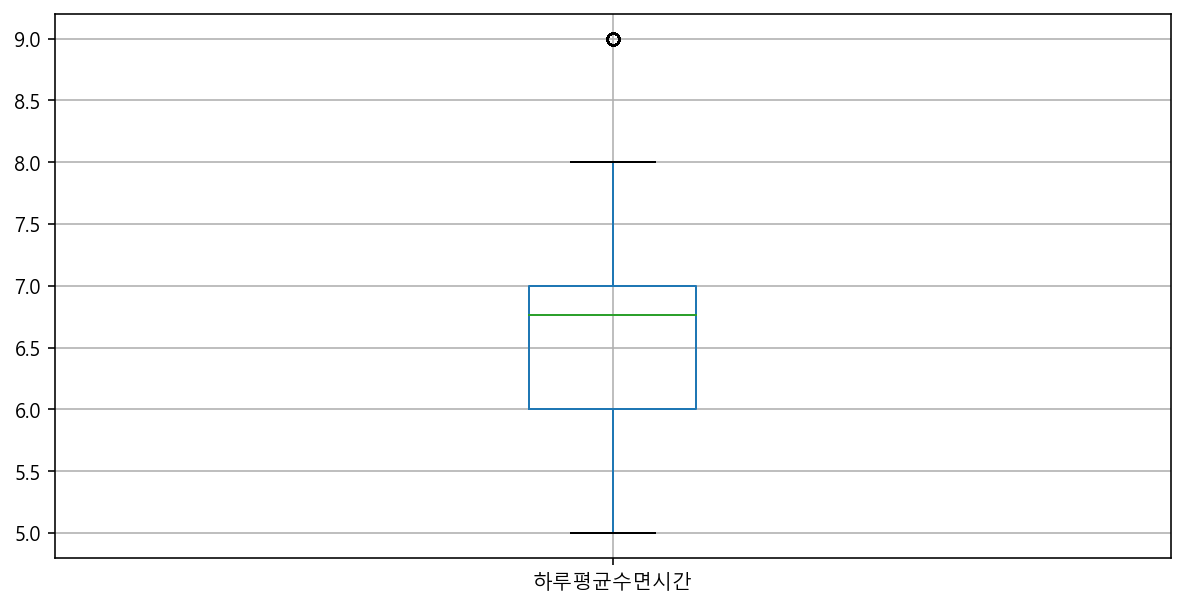

In [55]:
df1.boxplot(column = '하루평균수면시간', figsize=(10,5))

## 3. Clustering Analysis 

(K-means 군집분석 활용, 4개 군집형성)

In [56]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [57]:
df1.drop(['ID'], axis='columns', inplace=True)

In [58]:
df1.rename(columns = {"월평균가구총소득(만원)": "월평균가구총소득"}, inplace = True)

In [59]:
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1)
df1_scaled

array([[-0.02179844,  0.91948973,  0.71336702, ...,  0.42759361,
         0.4435803 ,  0.10563231],
       [-1.51177648, -1.08755973,  0.71336702, ..., -2.74869311,
        -2.77373924, -2.27836285],
       [ 0.79091686,  0.91948973, -0.97239943, ...,  0.42759361,
         0.4435803 ,  0.10563231],
       ...,
       [ 1.51333045, -1.08755973, -0.97239943, ...,  0.42759361,
         0.4435803 ,  2.48962746],
       [ 1.51333045,  0.91948973, -0.97239943, ...,  0.42759361,
         0.4435803 ,  0.10563231],
       [ 0.74576601,  0.91948973, -1.81528265, ...,  0.42759361,
         0.4435803 ,  0.10563231]])

In [60]:
clus = KMeans(4)
clus.fit(df1_scaled)
cluster_KMeans = [i+1 for i in clus.labels_]
df1['ClusterKmeans'] = cluster_KMeans
df1.head(5)

,age,성별,가구원수,기초생활수급여부,주택형태,월평균가구총소득,결혼여부,결혼상태,주관적건강상태,2주내몸이상여부(주관적),고혈압진단여부,이상지지혈증진단여부,우울증진단여부,우울증진단시기,우울증현재유병여부,우울증치료,활동제한여부,활동제한사유,불안우울설문,경제활동상태,미취업사유,하루평균수면시간,평소스트레스인지정도,2주이상우울감여부,1년간정신문제상담,1년간자살생각여부,1년간자살계획여부,1년간자살시도여부,당뇨병진단여부,ClusterKmeans
0,43,1,4.0,1,1,275.0,0,0,0,2,2,2,2,0.0,1,1,1,1,2,3,3,7.000000,5,2,2,2,2,2,1,4
1,10,0,4.0,1,1,275.0,1,1,3,0,0,0,0,0.0,0,0,2,0,1,0,2,6.762435,3,0,0,0,0,0,0,1
2,61,1,2.0,1,2,125.0,0,5,0,1,2,2,2,0.0,1,1,1,1,2,2,4,8.000000,5,3,2,2,2,2,1,4
3,35,0,2.0,1,2,125.0,1,1,4,1,2,2,2,0.0,1,1,1,1,2,3,3,8.000000,2,2,2,2,2,2,1,4
4,20,0,1.0,1,2,45.0,1,1,5,2,2,2,2,0.0,1,1,1,1,2,2,8,6.000000,2,2,2,2,2,2,1,4


In [61]:
df1_summary = df1.groupby('ClusterKmeans').agg(['min', 'mean', 'max', 'median'])
level0 = df1_summary.columns.get_level_values(0)
level1 = df1_summary.columns.get_level_values(1)
df1_summary.columns = level0 + '_' + level1
df1_summary.reset_index(inplace=True)
df1_summary.round(3)

,ClusterKmeans,age_min,age_mean,age_max,age_median,성별_min,성별_mean,성별_max,성별_median,가구원수_min,가구원수_mean,가구원수_max,가구원수_median,기초생활수급여부_min,기초생활수급여부_mean,기초생활수급여부_max,기초생활수급여부_median,주택형태_min,주택형태_mean,주택형태_max,주택형태_median,월평균가구총소득_min,월평균가구총소득_mean,월평균가구총소득_max,월평균가구총소득_median,결혼여부_min,결혼여부_mean,결혼여부_max,결혼여부_median,결혼상태_min,결혼상태_mean,결혼상태_max,결혼상태_median,주관적건강상태_min,주관적건강상태_mean,주관적건강상태_max,주관적건강상태_median,2주내몸이상여부(주관적)_min,2주내몸이상여부(주관적)_mean,2주내몸이상여부(주관적)_max,2주내몸이상여부(주관적)_median,고혈압진단여부_min,고혈압진단여부_mean,고혈압진단여부_max,고혈압진단여부_median,이상지지혈증진단여부_min,이상지지혈증진단여부_mean,이상지지혈증진단여부_max,이상지지혈증진단여부_median,우울증진단여부_min,...,활동제한여부_max,활동제한여부_median,활동제한사유_min,활동제한사유_mean,활동제한사유_max,활동제한사유_median,불안우울설문_min,불안우울설문_mean,불안우울설문_max,불안우울설문_median,경제활동상태_min,경제활동상태_mean,경제활동상태_max,경제활동상태_median,미취업사유_min,미취업사유_mean,미취업사유_max,미취업사유_median,하루평균수면시간_min,하루평균수면시간_mean,하루평균수면시간_max,하루평균수면시간_median,평소스트레스인지정도_min,평소스트레스인지정도_mean,평소스트레스인지정도_max,평소스트레스인지정도_median,2주이상우울감여부_min,2주이상우울감여부_mean,2주이상우울감여부_max,2주이상우울감여부_median,1년간정신문제상담_min,1년간정신문제상담_mean,1년간정신문제상담_max,1년간정신문제상담_median,1년간자살생각여부_min,1년간자살생각여부_mean,1년간자살생각여부_max,1년간자살생각여부_median,1년간자살계획여부_min,1년간자살계획여부_mean,1년간자살계획여부_max,1년간자살계획여부_median,1년간자살시도여부_min,1년간자살시도여부_mean,1년간자살시도여부_max,1년간자살시도여부_median,당뇨병진단여부_min,당뇨병진단여부_mean,당뇨병진단여부_max,당뇨병진단여부_median
0,1,6,46.566,77,48,0,0.485,1,0,1.0,3.200,5.0,3.0,0,1.083,2,1,0,2.589,4,3,45.0,364.167,955.0,310.000,0,0.275,1,0,0,0.720,5,0,0,2.997,5,3,0,0.009,2,0,0,0.246,3,0,0,0.231,3,0,0,...,2,2,0,0.001,1,0,0,0.999,1,1,0,0.002,2,0,0,1.998,2,2,5.0,6.767,9.0,6.762,0,3.137,5,3,0,0.853,3,0,0,0.784,3,0,0,0.797,3,0,0,0.782,3,0,0,0.782,3,0,0,0.114,2,0
1,2,19,56.820,77,59,0,0.800,1,1,1.0,2.500,5.0,2.0,0,1.228,2,1,0,2.412,4,2,45.0,275.484,955.0,183.667,0,0.080,1,0,0,1.184,5,0,0,2.356,5,4,0,1.432,2,1,2,2.376,3,2,2,2.344,3,2,3,...,1,1,1,1.416,3,1,0,1.440,4,2,2,2.392,3,2,0,2.724,8,3,5.0,6.684,9.0,7.000,0,2.936,5,2,0,2.424,3,2,0,2.292,3,2,0,2.236,3,2,0,2.056,3,2,0,1.996,3,2,1,1.136,2,1
2,3,6,12.841,77,10,0,0.476,1,0,1.0,3.969,5.0,4.0,1,1.061,2,1,0,2.720,4,3,45.0,431.099,955.0,410.000,0,0.957,1,1,0,1.012,5,1,0,3.795,5,4,1,1.102,2,1,1,1.063,3,1,1,1.054,3,1,1,...,1,1,1,1.017,3,1,1,2.955,4,3,0,1.283,3,1,0,3.820,8,3,5.0,6.893,9.0,6.762,0,3.704,5,4,0,1.351,3,1,0,1.339,3,1,0,1.338,3,1,0,1.329,3,1,0,1.330,3,1,1,1.007,2,1
3,4,12,51.013,77,52,0,0.558,1,1,1.0,2.944,5.0,3.0,0,1.074,2,1,0,2.577,4,3,45.0,369.242,955.0,313.667,0,0.168,1,0,0,0.671,5,0,0,3.431,5,4,0,1.187,2,1,1,2.247,3,2,1,2.158,3,2,0,...,2,1,0,1.078,3,1,0,1.822,4,2,0,2.578,3,3,0,3.342,8,3,5.0,6.745,9.0,7.000,0,3.299,5,5,0,2.116,3,2,0,2.011,3,2,0,2.042,3,2,0,2.010,3,2,0,2.003,3,2,0,1.092,2,1


### 군집 간 월평균소득의 차이가 있는지 통계적 가설검정 실시
(ANOVA Test 활용)

In [62]:
df1[['ClusterKmeans', '월평균가구총소득']]

,ClusterKmeans,월평균가구총소득
0,4,275.000000
1,1,275.000000
2,4,125.000000
3,4,125.000000
4,4,45.000000
...,...,...
7375,4,178.333333
7376,4,50.000000
7377,2,57.333333
7378,4,57.333333


In [63]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('월평균가구총소득 ~ C(ClusterKmeans)', data = df1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(ClusterKmeans),7.077304e+06,3.0,36.391884,2.445272e-23
Residual,4.781487e+08,7376.0,NaN,NaN


p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다. 따라서 군집별 월평균가구총소득 평균의 차이가 있다.

* 귀무가설 : 군집별 월평균가구총소득 평균의 차이가 없다.
* 대립가설 : 군집별 월평균가구총소득 평균의 차이가 있다.
* 통계적 결론 : 군집별 월평균가구총소득 평균의 차이가 있다.

### PCA dimension reduction
(2차원으로 축소 실시)

In [64]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(df1_scaled)
df1_pca = pca.transform(df1_scaled)
print(df1_pca.shape)

(7380, 2)


In [65]:
# PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
df1_pca = pd.DataFrame(df1_pca,columns=pca_columns)
df1_pca

,pca_component_1,pca_component_2
0,-1.680560,0.354172
1,9.058396,0.224191
2,-1.617819,1.615640
3,-1.082119,-0.238757
4,-1.398024,-0.940581
...,...,...
7375,-1.392863,1.293646
7376,-2.051838,2.714760
7377,-5.583307,-0.302481
7378,-2.270716,1.426346


###  차원 축소된 Column을 이용하여 K-means 군집분석 실시

(4개 군집 형성)

In [66]:
clus = KMeans(4)
clus.fit(df1_pca)
cluster_KMeans = [i+1 for i in clus.labels_]
df1_pca['ClusterKmeans_pca'] = cluster_KMeans
df1_pca

,pca_component_1,pca_component_2,ClusterKmeans_pca
0,-1.680560,0.354172,1
1,9.058396,0.224191,4
2,-1.617819,1.615640,1
3,-1.082119,-0.238757,1
4,-1.398024,-0.940581,1
...,...,...,...
7375,-1.392863,1.293646,1
7376,-2.051838,2.714760,1
7377,-5.583307,-0.302481,1
7378,-2.270716,1.426346,1


### 차원축소 후 군집 간 월평균소득의 차이가 있는지 통계적 가설검정 실시

In [67]:
df1['pca_component_1'] = df1_pca['pca_component_1']
df1['pca_component_2'] = df1_pca['pca_component_2']
df1['ClusterKmeans_pca'] = df1_pca['ClusterKmeans_pca']

In [68]:
df1

,age,성별,가구원수,기초생활수급여부,주택형태,월평균가구총소득,결혼여부,결혼상태,주관적건강상태,2주내몸이상여부(주관적),고혈압진단여부,이상지지혈증진단여부,우울증진단여부,우울증진단시기,우울증현재유병여부,우울증치료,활동제한여부,활동제한사유,불안우울설문,경제활동상태,미취업사유,하루평균수면시간,평소스트레스인지정도,2주이상우울감여부,1년간정신문제상담,1년간자살생각여부,1년간자살계획여부,1년간자살시도여부,당뇨병진단여부,ClusterKmeans,pca_component_1,pca_component_2,ClusterKmeans_pca
0,43,1,4.0,1,1,275.000000,0,0,0,2,2,2,2,0.0,1,1,1,1,2,3,3,7.000000,5,2,2,2,2,2,1,4,-1.680560,0.354172,1
1,10,0,4.0,1,1,275.000000,1,1,3,0,0,0,0,0.0,0,0,2,0,1,0,2,6.762435,3,0,0,0,0,0,0,1,9.058396,0.224191,4
2,61,1,2.0,1,2,125.000000,0,5,0,1,2,2,2,0.0,1,1,1,1,2,2,4,8.000000,5,3,2,2,2,2,1,4,-1.617819,1.615640,1
3,35,0,2.0,1,2,125.000000,1,1,4,1,2,2,2,0.0,1,1,1,1,2,3,3,8.000000,2,2,2,2,2,2,1,4,-1.082119,-0.238757,1
4,20,0,1.0,1,2,45.000000,1,1,5,2,2,2,2,0.0,1,1,1,1,2,2,8,6.000000,2,2,2,2,2,2,1,4,-1.398024,-0.940581,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375,58,0,2.0,1,2,178.333333,0,0,0,1,2,2,2,0.0,1,1,1,1,2,3,3,7.000000,5,2,2,2,2,2,1,4,-1.392863,1.293646,1
7376,55,1,1.0,1,2,50.000000,0,0,4,1,3,3,2,0.0,1,1,1,1,0,3,3,5.000000,5,2,2,2,2,2,1,4,-2.051838,2.714760,1
7377,77,0,2.0,1,2,57.333333,0,0,4,2,3,2,3,28.0,2,2,0,2,2,3,3,7.000000,0,2,2,2,2,2,2,2,-5.583307,-0.302481,1
7378,77,1,2.0,1,2,57.333333,0,0,4,2,2,3,2,0.0,1,1,1,1,2,3,3,6.000000,5,2,2,2,2,2,1,4,-2.270716,1.426346,1


In [69]:
model2 = ols('월평균가구총소득 ~ C(ClusterKmeans_pca)', data = df1).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)
anova_table2

,sum_sq,df,F,PR(>F)
C(ClusterKmeans_pca),9.586295e+06,3.0,49.55327,1.063093e-31
Residual,4.756397e+08,7376.0,NaN,NaN


군집간 월평균가구총소득 평균의 차이가 있다.

#### 군집분석

In [70]:
df1_k = pd.pivot_table(df1, index = 'ClusterKmeans', values = ['age', '성별', '월평균가구총소득', 
                                                               '우울증진단여부', '우울증현재유병여부'], aggfunc=np.mean)
df1_k

,age,성별,우울증진단여부,우울증현재유병여부,월평균가구총소득
ClusterKmeans,,,,,
1,46.566449,0.484749,0.002179,0.001089,364.167351
2,56.820000,0.800000,3.000000,2.620000,275.484132
3,12.840663,0.475847,1.046143,1.000000,431.099184
4,51.013472,0.558342,1.994819,0.998756,369.241650


#### 차원축소 군집분석

In [71]:
df1_kpca = pd.pivot_table(df1, index = 'ClusterKmeans_pca', values = ['age', '성별', '월평균가구총소득', 
                                                               '우울증진단여부', '우울증현재유병여부'], aggfunc=np.mean)
df1_kpca

,age,성별,우울증진단여부,우울증현재유병여부,월평균가구총소득
ClusterKmeans_pca,,,,,
1,51.641041,0.572773,2.047648,1.081682,360.464513
2,54.514634,0.512195,0.141463,0.070732,330.894875
3,12.333566,0.466434,1.078322,1.000000,448.685262
4,42.143119,0.478899,0.000000,0.000000,375.954356


#### 성별
- 0: 남성
- 1: 여성


#### 기초생활수급여부
- 1: 수급경험없음
- 2: 수급경험있음


#### 주택형태
- 1: 다세대주택
- 2: 단독주택
- 3: 아파트


#### 결혼여부
- 0: 기혼
- 1: 미혼


#### 결혼상태
- 0: 동거
- 1: 모름
- 2: 별거
- 3: 사별
- 4: 응답거부
- 5: 이혼

#### 주관적건강상태
- 0: 나쁨
- 1: 매우나쁨
- 2: 매우좋음
- 3: 무응답
- 4: 보통
- 5: 좋음


#### 2주내몸이상여부(주관적)
- 0: 무응답
- 1: 아니오
- 2: 예


#### 고혈압진단여부
- 0: 무응답
- 1: 비해당(청소년/소아)
- 2: 없음
- 3: 있음


#### 이상지지혈증진단여부
- 0: 무응답
- 1: 비해당(청소년/소아)
- 2: 없음
- 3: 있음


#### 우울증진단여부
- 0: 무응답
- 1: 비해당(청소년/소아)
- 2: 없음
- 3: 있음


#### 우울증치료
- 0: 무응답
- 1: 비해당(청소년/소아)
- 2: 없음
- 3: 있음


#### 활동제한사유
- 0: 무응답
- 1: 비해당
- 2: 아니오
- 3: 예


#### 불안우울설문
- 0: 다소불안하거나우울함
- 1: 무응답
- 2: 불안하거나우울하지않음
- 3: 비해당(청소년/소아) 
- 4: 심하게불안하거나우울함


#### 경제활동상태
- 0: 무응답
- 1: 비해당(청소년)
- 2: 실업자(비경제인구)
- 3: 취업자


#### 미취업사유
- 0: 건강상이유
- 1: 기타
- 2: 무응답
- 3: 비해당(청소년) 
- 4: 실업/구직      
- 5: 육아/간병      
- 6: 정년퇴직       
- 7: 필요를느끼지못함
- 8: 학원/학교재학


#### 평소스트레스인지정도
- 0: 거의느끼지않음
- 1: 대단히많이느낌
- 2: 많이느낌
- 3: 무응답 
- 4: 비해당
- 5: 조금느낌


#### 2주이상우울감여부
- 0: 무응답
- 1: 비해당(청소년/소아)
- 2: 아니오
- 3: 예


#### 1년간정신문제상담
- 0: 무응답
- 1: 비해당(청소년/소아)
- 2: 아니오
- 3: 예


#### 1년간자살생각여부
- 0: 무응답
- 1: 비해당(청소년/소아)
- 2: 아니오
- 3: 예


#### 1년간자살계획여부
- 0: 무응답
- 1: 비해당(청소년/소아)
- 2: 아니오
- 3: 예


#### 1년간자살시도여부
- 0: 무응답
- 1: 비해당(청소년/소아)
- 2: 아니오
- 3: 예


#### 당뇨병진단여부
- 0: 무응답
- 1: 없음
- 2: 있음

##### 우울증 진단여부

- 0: 무응답
- 1: 비해당(청소년/소아)
- 2: 없음
- 3: 있음

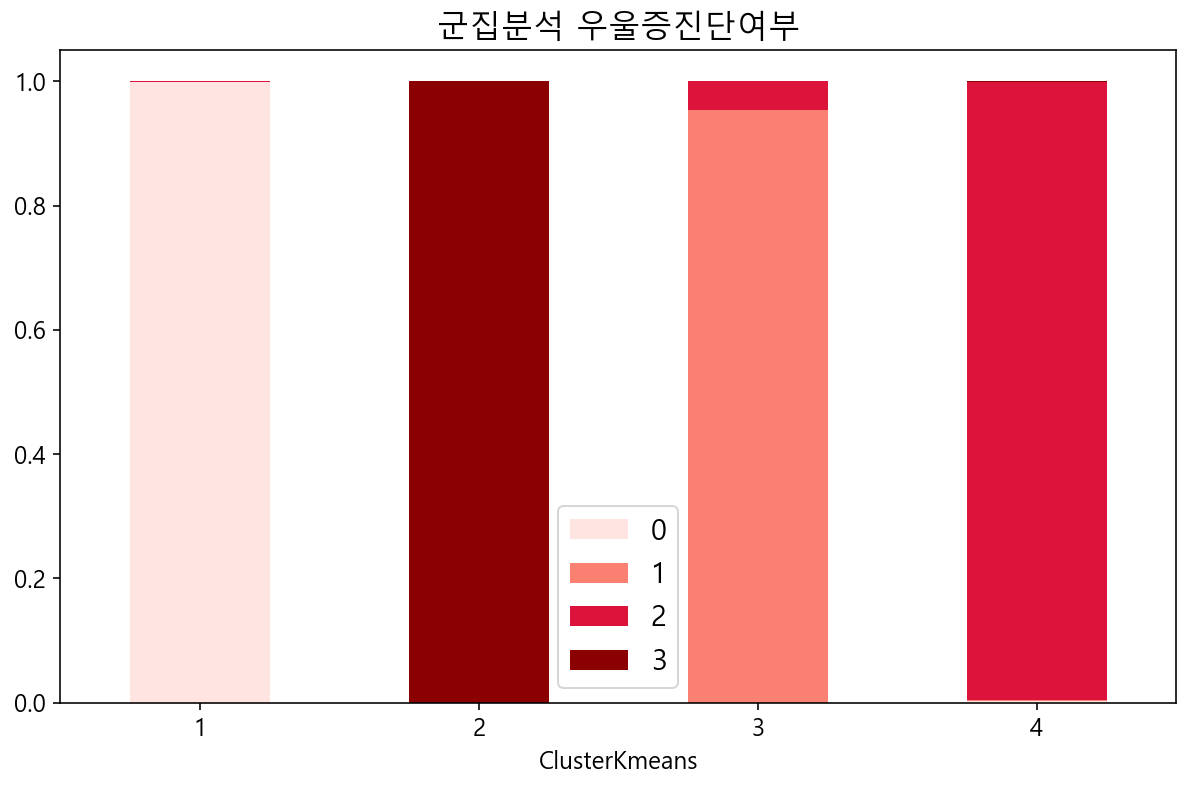

In [72]:
ct = pd.crosstab(df1['ClusterKmeans'], df1['우울증진단여부'])
cols = ct.columns.tolist()
cols = [ 0, 1, 2, 3]
ct = ct[cols]

totals = []
for i in range(len(ct)):
    totals.append(sum(ct.iloc[i, :]))

cl = ct.columns.to_list()

color_list = ['MistyRose','Salmon','Crimson', 'darkred']

for i in range(len(cl)):
    ct[cl[i]] = ct[cl[i]] / totals
    
fig = ct.plot.bar(stacked=True, figsize=(10,6), color=color_list)
plt.xticks(fontsize=12, rotation=360)
plt.yticks(fontsize=12)
plt.xlabel('ClusterKmeans', fontsize=12)
plt.title('군집분석 우울증진단여부', fontsize=16)
plt.legend(fontsize='x-large')
plt.show()

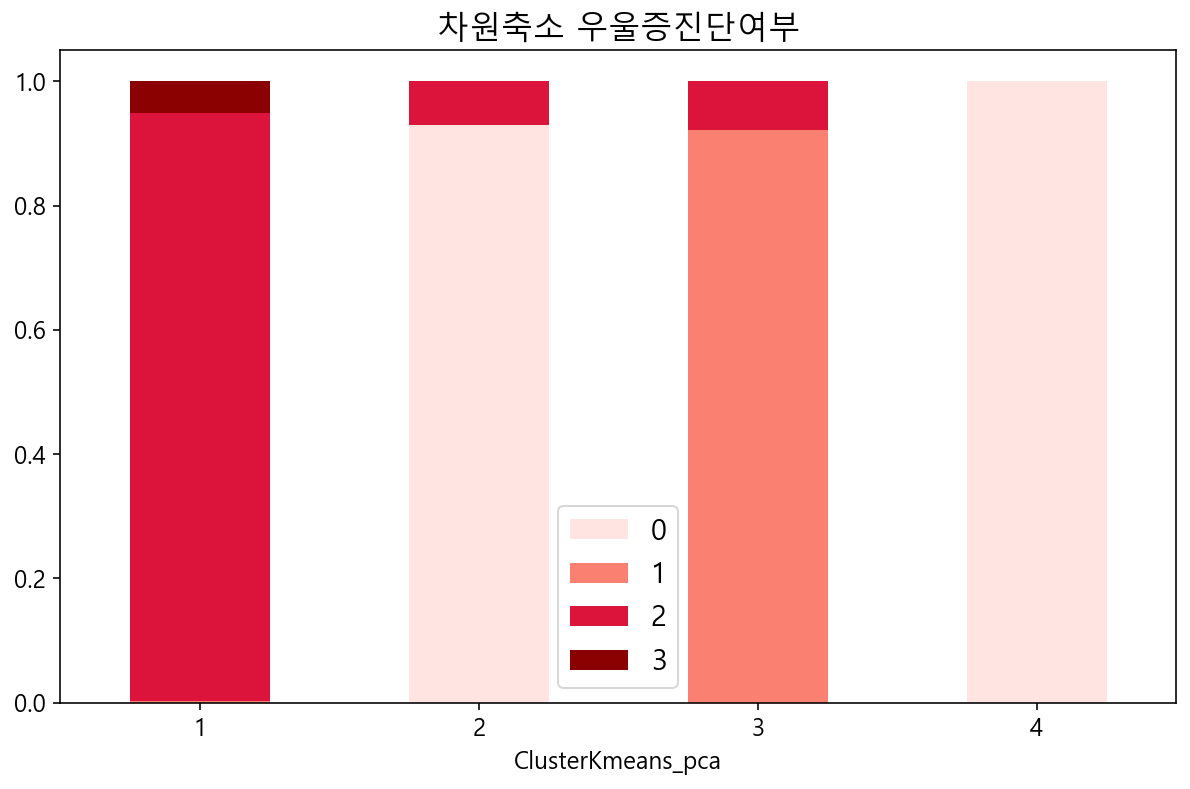

In [73]:
ct = pd.crosstab(df1['ClusterKmeans_pca'], df1['우울증진단여부'])
cols = ct.columns.tolist()
cols = [ 0, 1, 2, 3]
ct = ct[cols]

totals = []
for i in range(len(ct)):
    totals.append(sum(ct.iloc[i, :]))

cl = ct.columns.to_list()

color_list = ['MistyRose','Salmon','Crimson', 'darkred']

for i in range(len(cl)):
    ct[cl[i]] = ct[cl[i]] / totals
    
fig = ct.plot.bar(stacked=True, figsize=(10,6), color=color_list)
plt.xticks(fontsize=12, rotation=360)
plt.yticks(fontsize=12)
plt.xlabel('ClusterKmeans_pca', fontsize=12)
plt.title('차원축소 우울증진단여부', fontsize=16)
plt.legend(fontsize='x-large')
plt.show()

군집분석
- 1번 집단 : 무응답
- 2번 집단 : 있음
- 3번 집단 : 없음
- 4번 집단 : 비해당(청소년/소아) + 없음(일부)
    
차원축소 군집분석
- 1번 집단 : 없음 + 있음(일부)
- 2번 집단 : 무응답
- 3번 집단 : 비해당(청소년/소아) + 없음(일부)
- 4번 집단 : 무응답 + 없음(일부)

#### 우울증진단여부를 기준으로 봤을 때, 차원축소를 하지 않은 군집분석 결과가 집단을 더 명확하게 분류한 것으로 보인다.

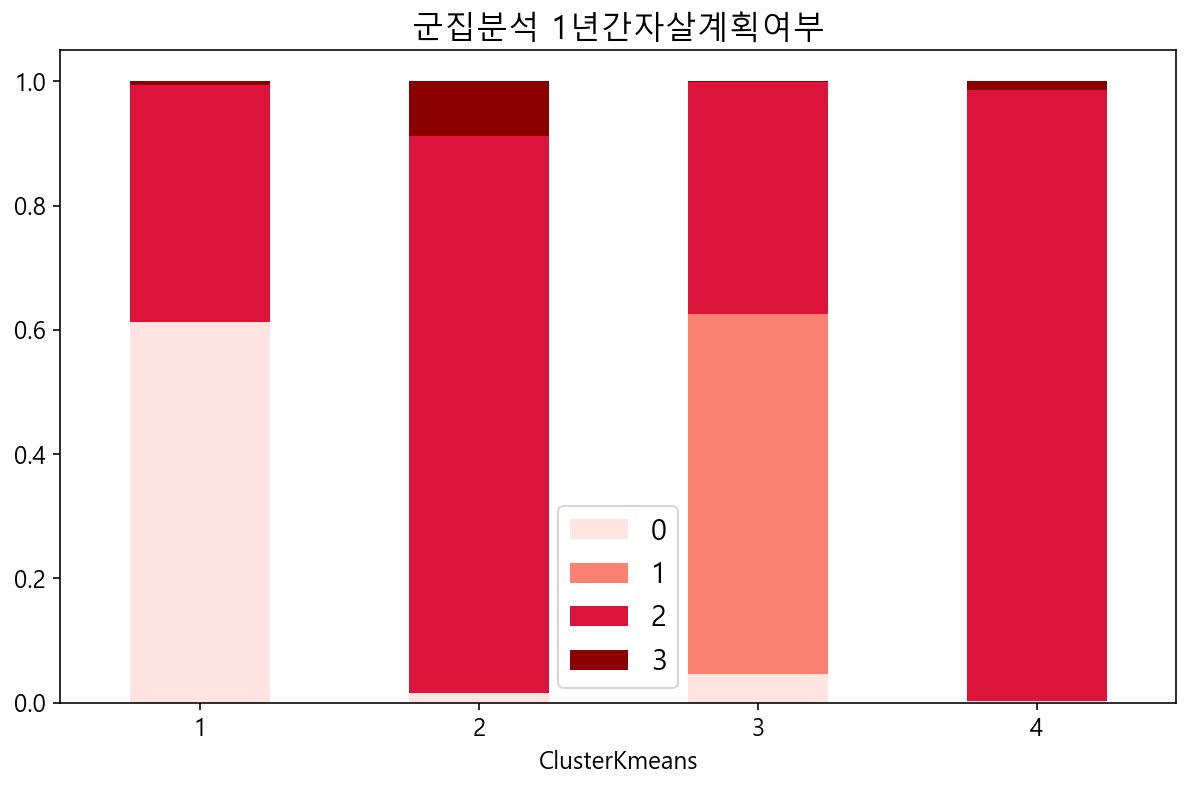

In [74]:
ct = pd.crosstab(df1['ClusterKmeans'], df1['1년간자살계획여부'])
cols = ct.columns.tolist()
cols = [ 0, 1, 2, 3]
ct = ct[cols]

totals = []
for i in range(len(ct)):
    totals.append(sum(ct.iloc[i, :]))

cl = ct.columns.to_list()

color_list = ['MistyRose','Salmon','Crimson', 'darkred']

for i in range(len(cl)):
    ct[cl[i]] = ct[cl[i]] / totals
    
fig = ct.plot.bar(stacked=True, figsize=(10,6), color=color_list)
plt.xticks(fontsize=12, rotation=360)
plt.yticks(fontsize=12)
plt.xlabel('ClusterKmeans', fontsize=12)
plt.title('군집분석 1년간자살계획여부', fontsize=16)
plt.legend(fontsize='x-large')
plt.show()

#### 1년간자살계획여부
- 0: 무응답
- 1: 비해당(청소년/소아)
- 2: 아니오
- 3: 예

#### 우울증진단을 받은 2번 집단에서 '1년간자살계획여부'가 '예'인 비율이 가장 높게 나타난다.

#### 우울증치료
- 0: 무응답
- 1: 비해당(청소년/소아)
- 2: 없음
- 3: 있음

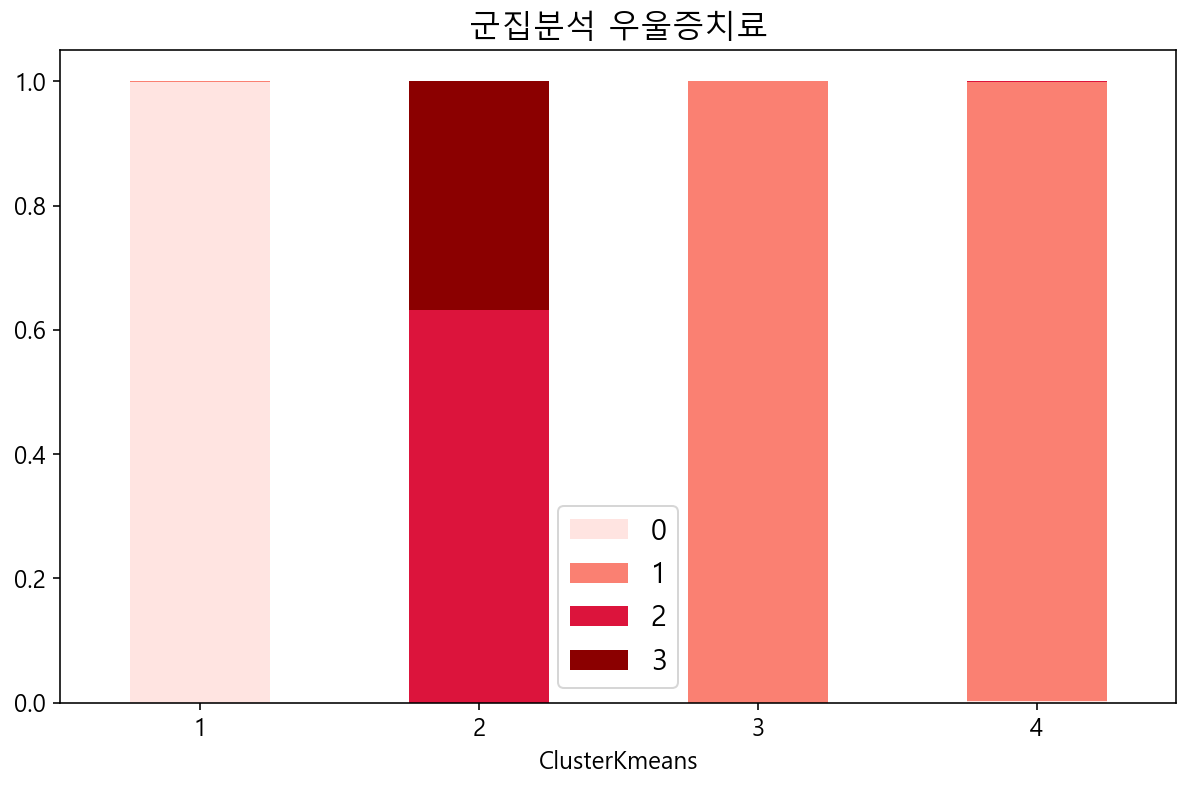

In [75]:
ct = pd.crosstab(df1['ClusterKmeans'], df1['우울증치료'])
cols = ct.columns.tolist()
cols = [ 0, 1, 2, 3]
ct = ct[cols]

totals = []
for i in range(len(ct)):
    totals.append(sum(ct.iloc[i, :]))

cl = ct.columns.to_list()

color_list = ['MistyRose','Salmon','Crimson', 'darkred']

for i in range(len(cl)):
    ct[cl[i]] = ct[cl[i]] / totals
    
fig = ct.plot.bar(stacked=True, figsize=(10,6), color=color_list)
plt.xticks(fontsize=12, rotation=360)
plt.yticks(fontsize=12)
plt.xlabel('ClusterKmeans', fontsize=12)
plt.title('군집분석 우울증치료', fontsize=16)
plt.legend(fontsize='x-large')
plt.show()

#### 우을증진단을 받은 2번 집단의 경우, 우울증치료 경험이 있다고 응답한 비율보다 없다고 응답한 비율이 더 높다. 

#### 1년간정신문제상담
- 0: 무응답
- 1: 비해당(청소년/소아)
- 2: 아니오
- 3: 예

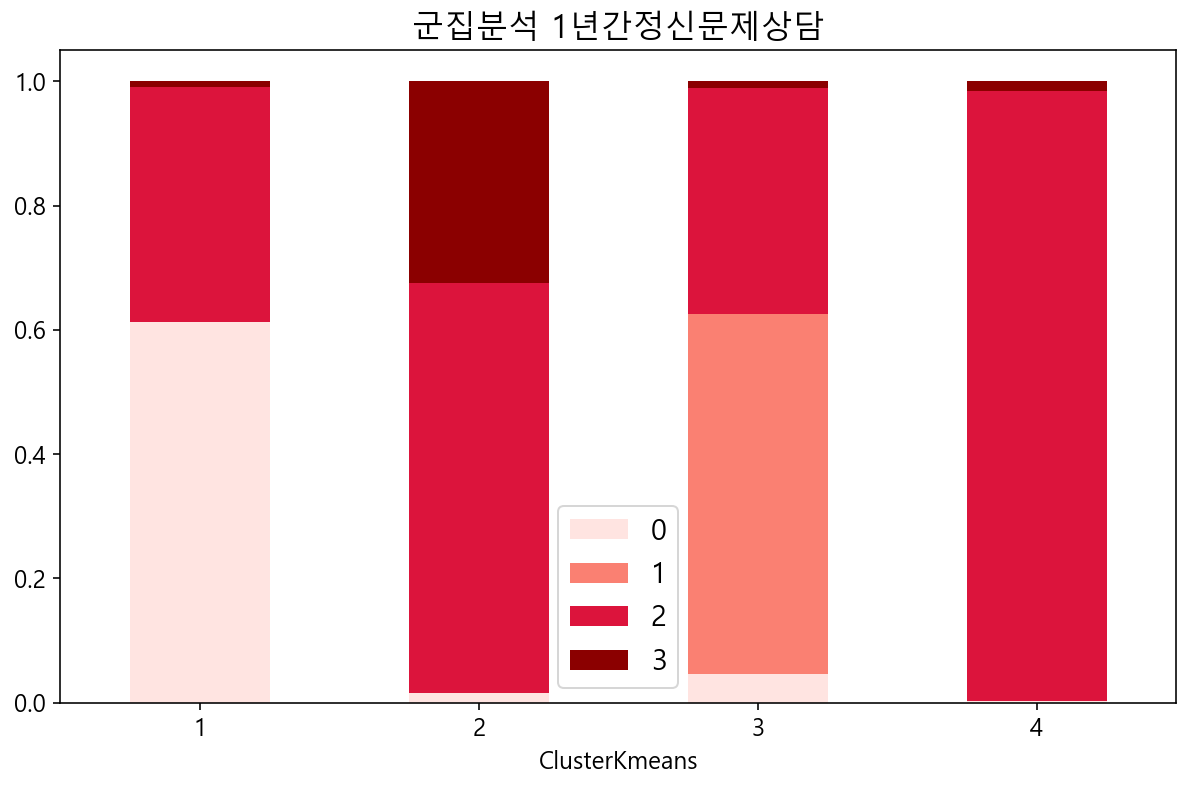

In [76]:
ct = pd.crosstab(df1['ClusterKmeans'], df1['1년간정신문제상담'])
cols = ct.columns.tolist()
cols = [ 0, 1, 2, 3]
ct = ct[cols]

totals = []
for i in range(len(ct)):
    totals.append(sum(ct.iloc[i, :]))

cl = ct.columns.to_list()

color_list = ['MistyRose','Salmon','Crimson', 'darkred']

for i in range(len(cl)):
    ct[cl[i]] = ct[cl[i]] / totals
    
fig = ct.plot.bar(stacked=True, figsize=(10,6), color=color_list)
plt.xticks(fontsize=12, rotation=360)
plt.yticks(fontsize=12)
plt.xlabel('ClusterKmeans', fontsize=12)
plt.title('군집분석 1년간정신문제상담', fontsize=16)
plt.legend(fontsize='x-large')
plt.show()

#### 2번 집단에서 1년간 정신문제상담을 받았다고 응답한 비율보다 받지 않았다고 응답한 비율이 더 높다. 

#### 성별

0: 남성 / 1: 여성

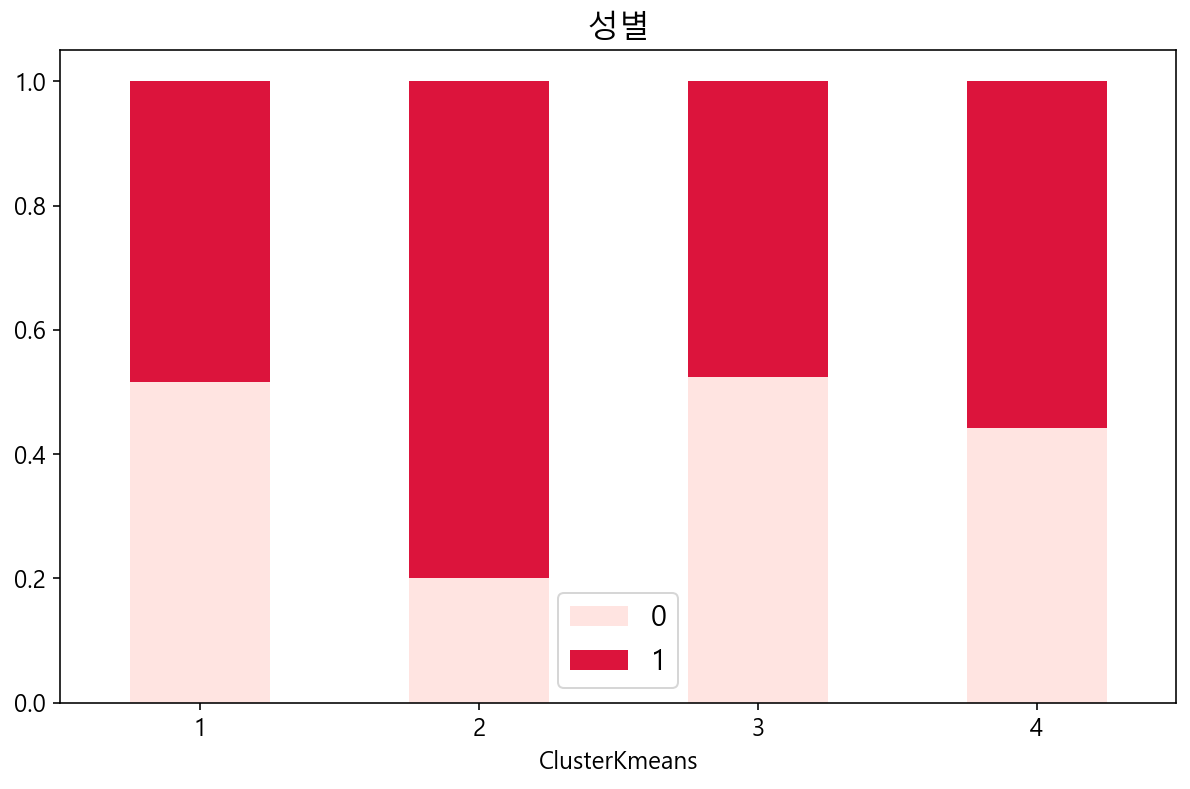

In [77]:
ct = pd.crosstab(df1['ClusterKmeans'], df1['성별'])
cols = ct.columns.tolist()
cols = [ 0, 1]
ct = ct[cols]

totals = []
for i in range(len(ct)):
    totals.append(sum(ct.iloc[i, :]))

cl = ct.columns.to_list()

color_list = ['MistyRose','Crimson']

for i in range(len(cl)):
    ct[cl[i]] = ct[cl[i]] / totals
    
fig = ct.plot.bar(stacked=True, figsize=(10,6), color=color_list)
plt.xticks(fontsize=12, rotation=360)
plt.yticks(fontsize=12)
plt.xlabel('ClusterKmeans', fontsize=12)
plt.title('성별', fontsize=16)
plt.legend(fontsize='x-large')
plt.show()

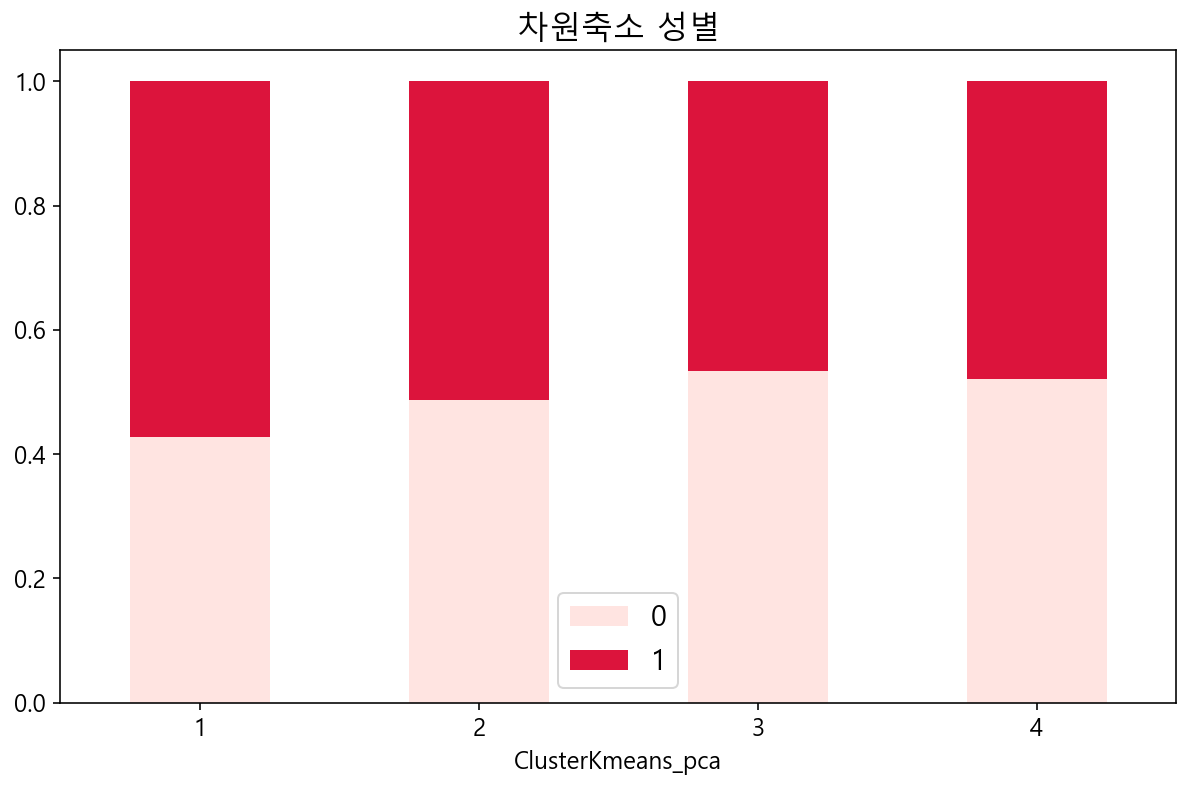

In [78]:
ct = pd.crosstab(df1['ClusterKmeans_pca'], df1['성별'])
cols = ct.columns.tolist()
cols = [ 0, 1]
ct = ct[cols]

totals = []
for i in range(len(ct)):
    totals.append(sum(ct.iloc[i, :]))

cl = ct.columns.to_list()

color_list = ['MistyRose','Crimson']

for i in range(len(cl)):
    ct[cl[i]] = ct[cl[i]] / totals
    
fig = ct.plot.bar(stacked=True, figsize=(10,6), color=color_list)
plt.xticks(fontsize=12, rotation=360)
plt.yticks(fontsize=12)
plt.xlabel('ClusterKmeans_pca', fontsize=12)
plt.title('차원축소 성별', fontsize=16)
plt.legend(fontsize='x-large')
plt.show()

군집분석 - 군집별로 남녀 비율 대체로 비슷하나, 2번 군집은 여성의 비율이 훨씬 높다.
- 1 : 무응답
- 2 : 있음
- 3 : 없음
- 4 : 비해당(청소년/소아) + 없음(일부)
    
차원축소 군집분석 - 군집별로 남녀 비율 대체로 비슷함
- 1 : 없음 + 있음(일부)
- 2 : 무응답
- 3 : 비해당(청소년/소아) + 없음(일부)
- 4 : 무응답 + 없음(일부)

#### '우울증진단여부'가 '있음'으로 분류된 2번 집단의 여성 비율이 훨씬 높은 것으로 보아, 
#### 남성에 비하여 여성이 우울증 진단을 받는 경우가 더 많다는 것을 알 수 있다.

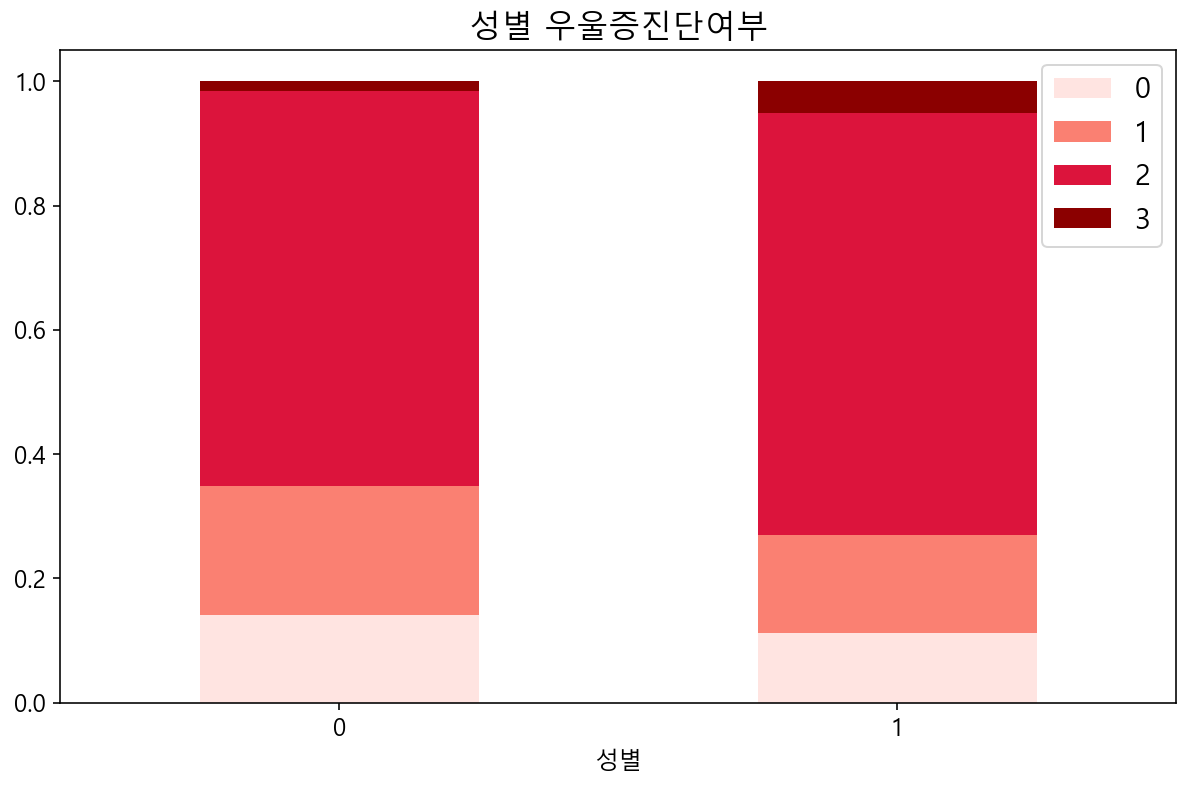

In [79]:
ct = pd.crosstab(df1['성별'], df1['우울증진단여부'])
cols = ct.columns.tolist()
cols = [ 0, 1, 2, 3]
ct = ct[cols]

totals = []
for i in range(len(ct)):
    totals.append(sum(ct.iloc[i, :]))

cl = ct.columns.to_list()

color_list = ['MistyRose','Salmon','Crimson', 'darkred']

for i in range(len(cl)):
    ct[cl[i]] = ct[cl[i]] / totals
    
fig = ct.plot.bar(stacked=True, figsize=(10,6), color=color_list)
plt.xticks(fontsize=12, rotation=360)
plt.yticks(fontsize=12)
plt.xlabel('성별', fontsize=12)
plt.title('성별 우울증진단여부', fontsize=16)
plt.legend(fontsize='x-large')
plt.show()

#### 경제력 (기초생활수급여부, 월평균가구총소득, 경제활동상태, 미취업사유)

##### 기초생활수급여부
- 1: 수급경험없음
- 2: 수급경험있음

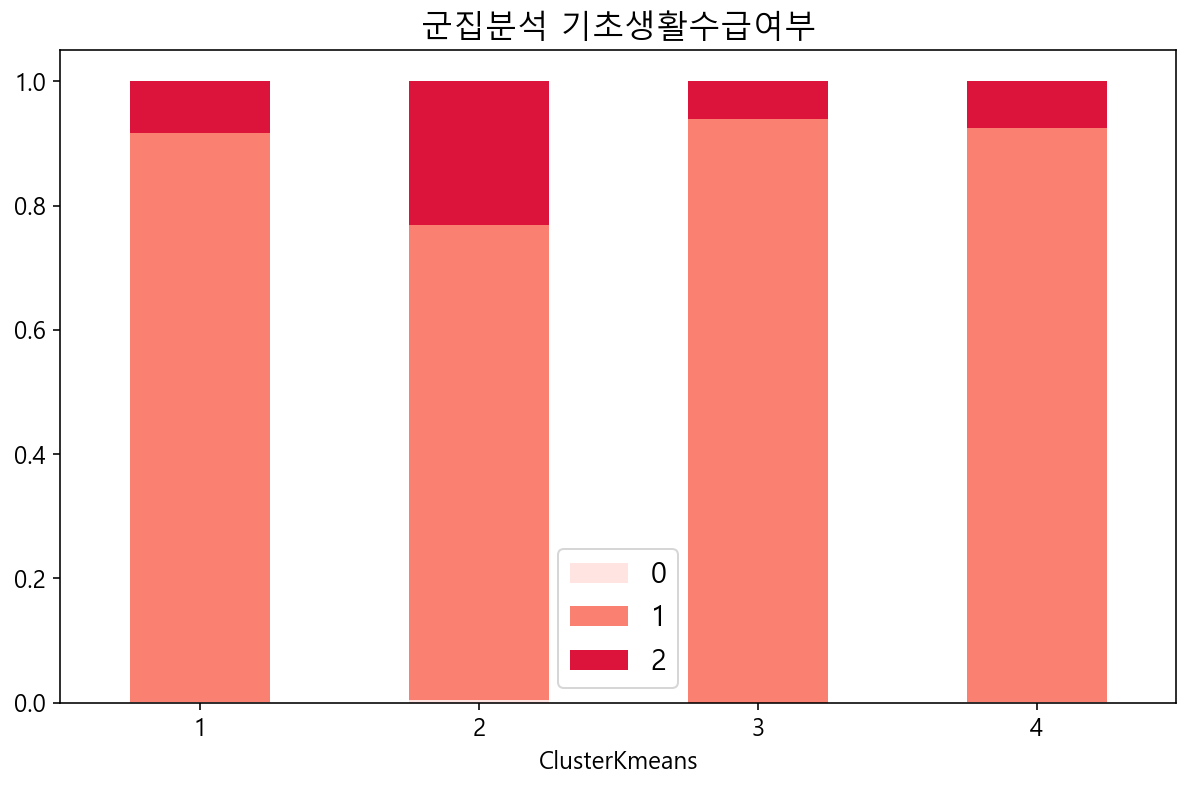

In [80]:
ct = pd.crosstab(df1['ClusterKmeans'], df1['기초생활수급여부'])
cols = ct.columns.tolist()
cols = [ 0, 1, 2]
ct = ct[cols]

totals = []
for i in range(len(ct)):
    totals.append(sum(ct.iloc[i, :]))

cl = ct.columns.to_list()

color_list = ['MistyRose','Salmon','Crimson']

for i in range(len(cl)):
    ct[cl[i]] = ct[cl[i]] / totals
    
fig = ct.plot.bar(stacked=True, figsize=(10,6), color=color_list)
plt.xticks(fontsize=12, rotation=360)
plt.yticks(fontsize=12)
plt.xlabel('ClusterKmeans', fontsize=12)
plt.title('군집분석 기초생활수급여부', fontsize=16)
plt.legend(fontsize='x-large')
plt.show()

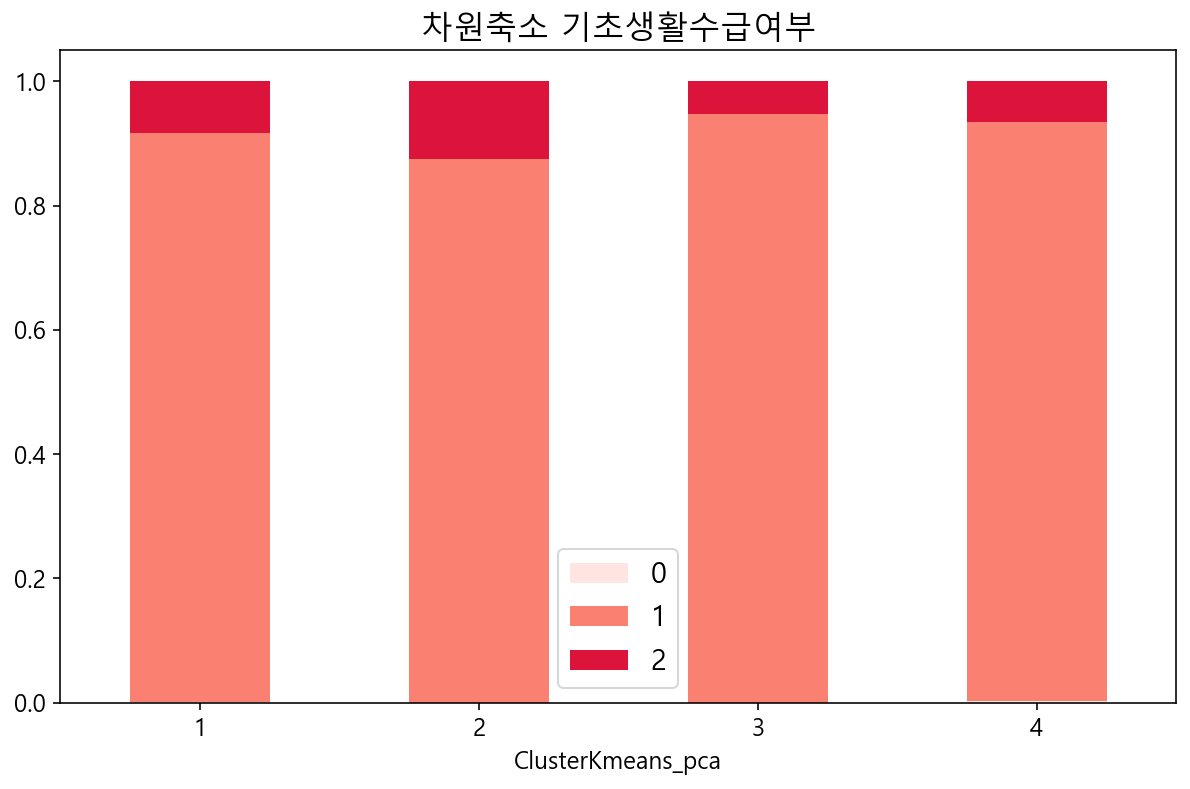

In [81]:
ct = pd.crosstab(df1['ClusterKmeans_pca'], df1['기초생활수급여부'])
cols = ct.columns.tolist()
cols = [ 0, 1, 2]
ct = ct[cols]

totals = []
for i in range(len(ct)):
    totals.append(sum(ct.iloc[i, :]))

cl = ct.columns.to_list()

color_list = ['MistyRose','Salmon','Crimson']

for i in range(len(cl)):
    ct[cl[i]] = ct[cl[i]] / totals
    
fig = ct.plot.bar(stacked=True, figsize=(10,6), color=color_list)
plt.xticks(fontsize=12, rotation=360)
plt.yticks(fontsize=12)
plt.xlabel('ClusterKmeans_pca', fontsize=12)
plt.title('차원축소 기초생활수급여부', fontsize=16)
plt.legend(fontsize='x-large')
plt.show()

군집분석 - 군집별로 남녀 비율 대체로 비슷하나, 2번 군집은 여성의 비율이 훨씬 높다.
- 1 : 무응답
- 2 : 있음 / 여성 비율 높음 / 기초생활수급경험있음 비율 높음
- 3 : 없음
- 4 : 비해당(청소년/소아) + 없음(일부)
    
차원축소 군집분석 - 군집별로 남녀 비율 대체로 비슷함
- 1 : 없음 + 있음(일부)
- 2 : 무응답
- 3 : 비해당(청소년/소아) + 없음(일부)
- 4 : 무응답 + 없음(일부) / 기초생활수급경험있음 비율 높음

##### 경제활동상태
- 0: 무응답
- 1: 비해당(청소년)
- 2: 실업자(비경제인구)
- 3: 취업자

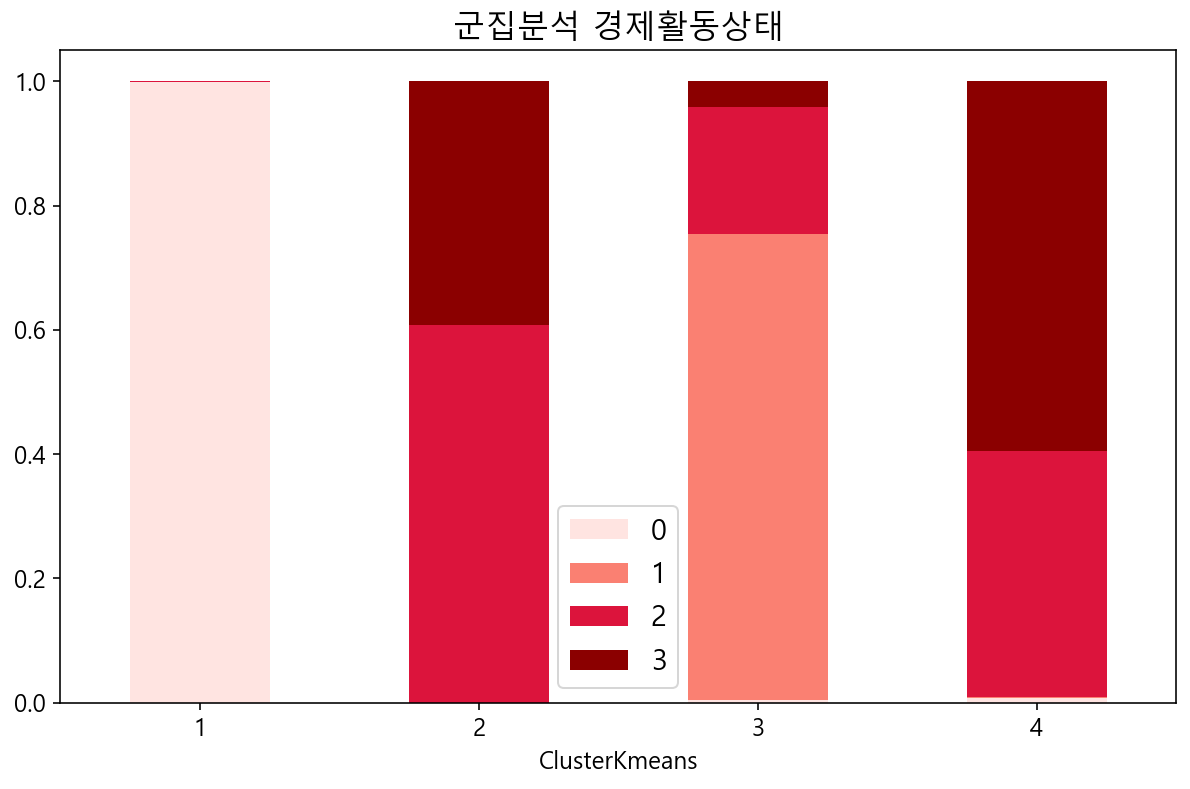

In [82]:
ct = pd.crosstab(df1['ClusterKmeans'], df1['경제활동상태'])
cols = ct.columns.tolist()
cols = [ 0, 1, 2, 3]
ct = ct[cols]

totals = []
for i in range(len(ct)):
    totals.append(sum(ct.iloc[i, :]))

cl = ct.columns.to_list()

color_list = ['MistyRose','Salmon','Crimson', 'darkred']

for i in range(len(cl)):
    ct[cl[i]] = ct[cl[i]] / totals
    
fig = ct.plot.bar(stacked=True, figsize=(10,6), color=color_list)
plt.xticks(fontsize=12, rotation=360)
plt.yticks(fontsize=12)
plt.xlabel('ClusterKmeans', fontsize=12)
plt.title('군집분석 경제활동상태', fontsize=16)
plt.legend(fontsize='x-large')
plt.show()

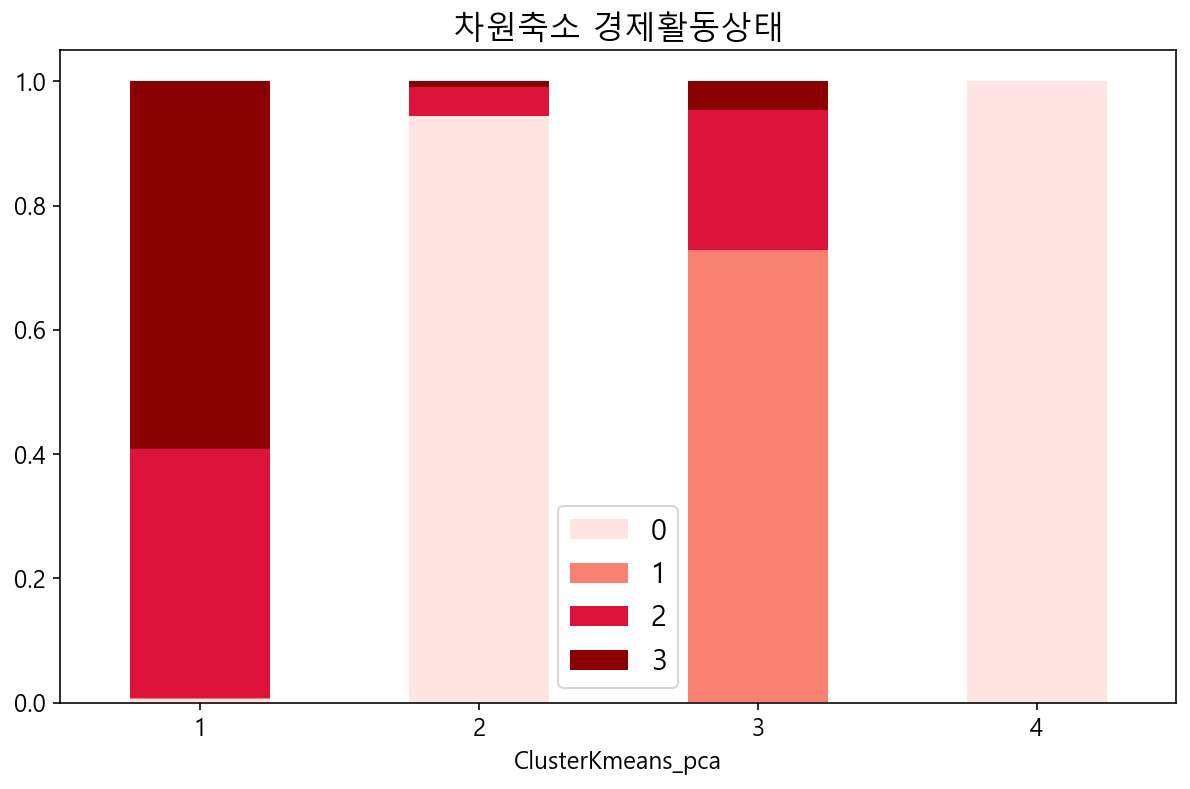

In [83]:
ct = pd.crosstab(df1['ClusterKmeans_pca'], df1['경제활동상태'])
cols = ct.columns.tolist()
cols = [ 0, 1, 2, 3]
ct = ct[cols]

totals = []
for i in range(len(ct)):
    totals.append(sum(ct.iloc[i, :]))

cl = ct.columns.to_list()

color_list = ['MistyRose','Salmon','Crimson', 'darkred']

for i in range(len(cl)):
    ct[cl[i]] = ct[cl[i]] / totals
    
fig = ct.plot.bar(stacked=True, figsize=(10,6), color=color_list)
plt.xticks(fontsize=12, rotation=360)
plt.yticks(fontsize=12)
plt.xlabel('ClusterKmeans_pca', fontsize=12)
plt.title('차원축소 경제활동상태', fontsize=16)
plt.legend(fontsize='x-large')
plt.show()

군집분석 - 군집별로 남녀 비율 대체로 비슷하나, 2번 군집은 여성의 비율이 훨씬 높다.
- 1 : 무응답
- 2 : 있음 / 여성 비율 높음 / 기초생활수급경험있음 비율 높음 / 실업자 비율이 가장 높음
- 3 : 없음
- 4 : 비해당(청소년/소아) + 없음(일부)
    
차원축소 군집분석 - 군집별로 남녀 비율 대체로 비슷함
- 1 : 없음 + 있음(일부)
- 2 : 무응답
- 3 : 비해당(청소년/소아) + 없음(일부)
- 4 : 무응답 + 없음(일부) / 기초생활수급경험있음 비율 높음

#### 건강상태 (주관적건강상태, 고혈압진단여부, 이상지지혈증진단여부, 당뇨병진단여부)

##### 주관적건강상태
- 0: 나쁨
- 1: 매우나쁨
- 2: 매우좋음
- 3: 무응답
- 4: 보통
- 5: 좋음

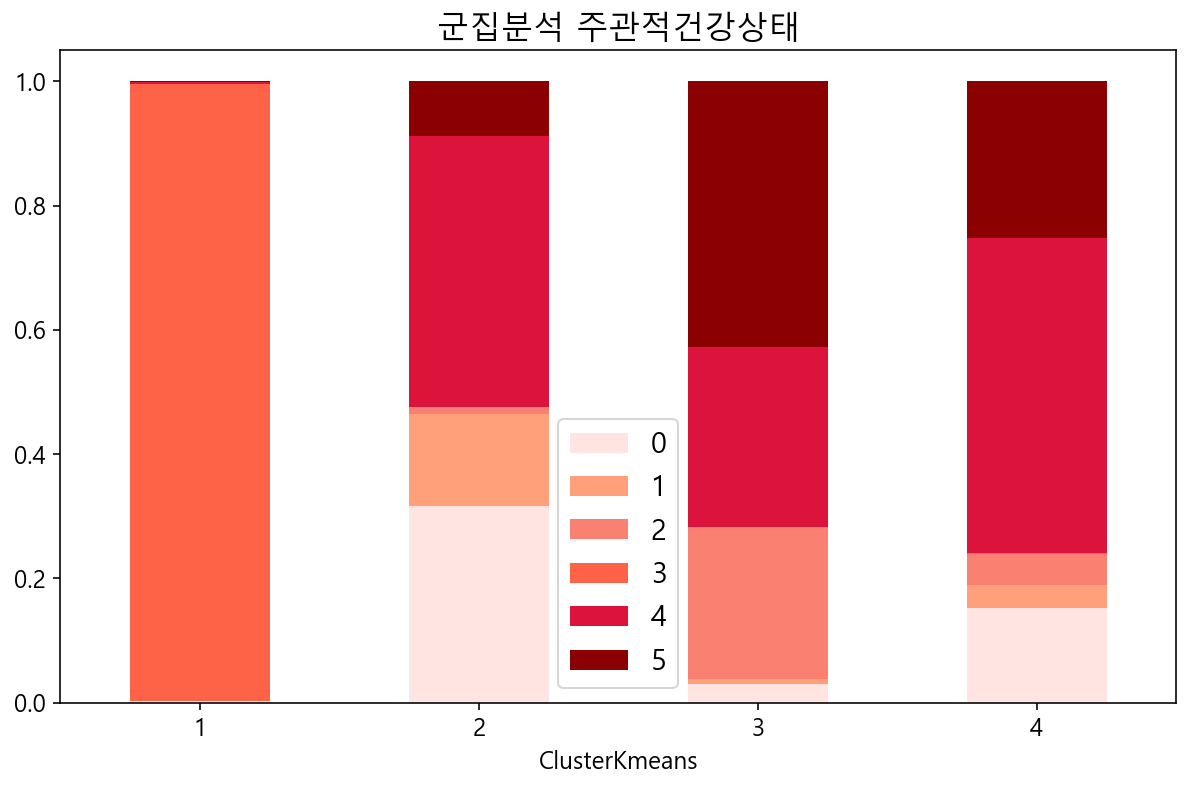

In [84]:
ct = pd.crosstab(df1['ClusterKmeans'], df1['주관적건강상태'])
cols = ct.columns.tolist()
cols = [ 0, 1, 2, 3, 4, 5]
ct = ct[cols]

totals = []
for i in range(len(ct)):
    totals.append(sum(ct.iloc[i, :]))

cl = ct.columns.to_list()

color_list = ['MistyRose','lightsalmon', 'Salmon','tomato', 'Crimson', 'darkred']

for i in range(len(cl)):
    ct[cl[i]] = ct[cl[i]] / totals
    
fig = ct.plot.bar(stacked=True, figsize=(10,6), color=color_list)
plt.xticks(fontsize=12, rotation=360)
plt.yticks(fontsize=12)
plt.xlabel('ClusterKmeans', fontsize=12)
plt.title('군집분석 주관적건강상태', fontsize=16)
plt.legend(fontsize='x-large')
plt.show()

#### 2번 집단의 경우, 주관적 건강상태를 '나쁨', '매우나쁨'으로 선택한 비율이 가장 높다.

##### 고혈압진단여부
- 0: 무응답
- 1: 비해당(청소년/소아)
- 2: 없음
- 3: 있음

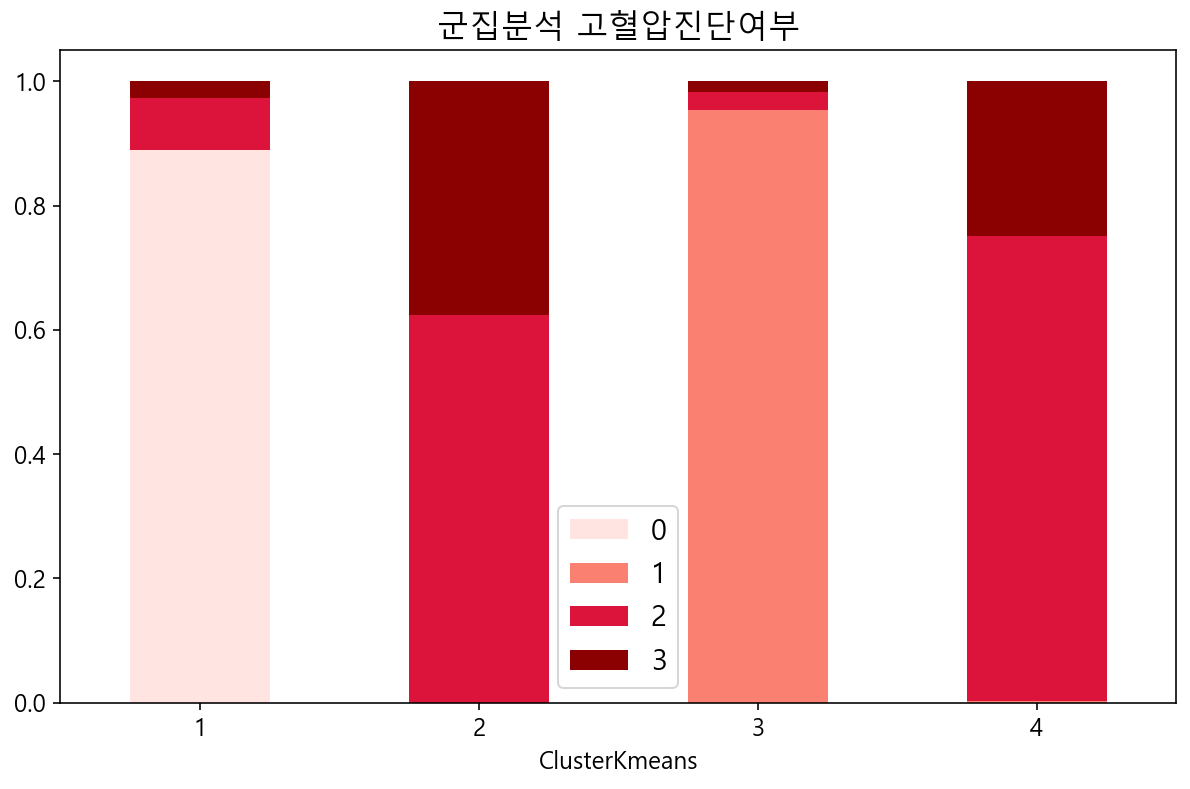

In [85]:
ct = pd.crosstab(df1['ClusterKmeans'], df1['고혈압진단여부'])
cols = ct.columns.tolist()
cols = [ 0, 1, 2, 3]
ct = ct[cols]

totals = []
for i in range(len(ct)):
    totals.append(sum(ct.iloc[i, :]))

cl = ct.columns.to_list()

color_list = ['MistyRose','Salmon','Crimson', 'darkred']

for i in range(len(cl)):
    ct[cl[i]] = ct[cl[i]] / totals
    
fig = ct.plot.bar(stacked=True, figsize=(10,6), color=color_list)
plt.xticks(fontsize=12, rotation=360)
plt.yticks(fontsize=12)
plt.xlabel('ClusterKmeans', fontsize=12)
plt.title('군집분석 고혈압진단여부', fontsize=16)
plt.legend(fontsize='x-large')
plt.show()

##### 당뇨병진단여부
- 0: 무응답
- 1: 없음
- 2: 있음

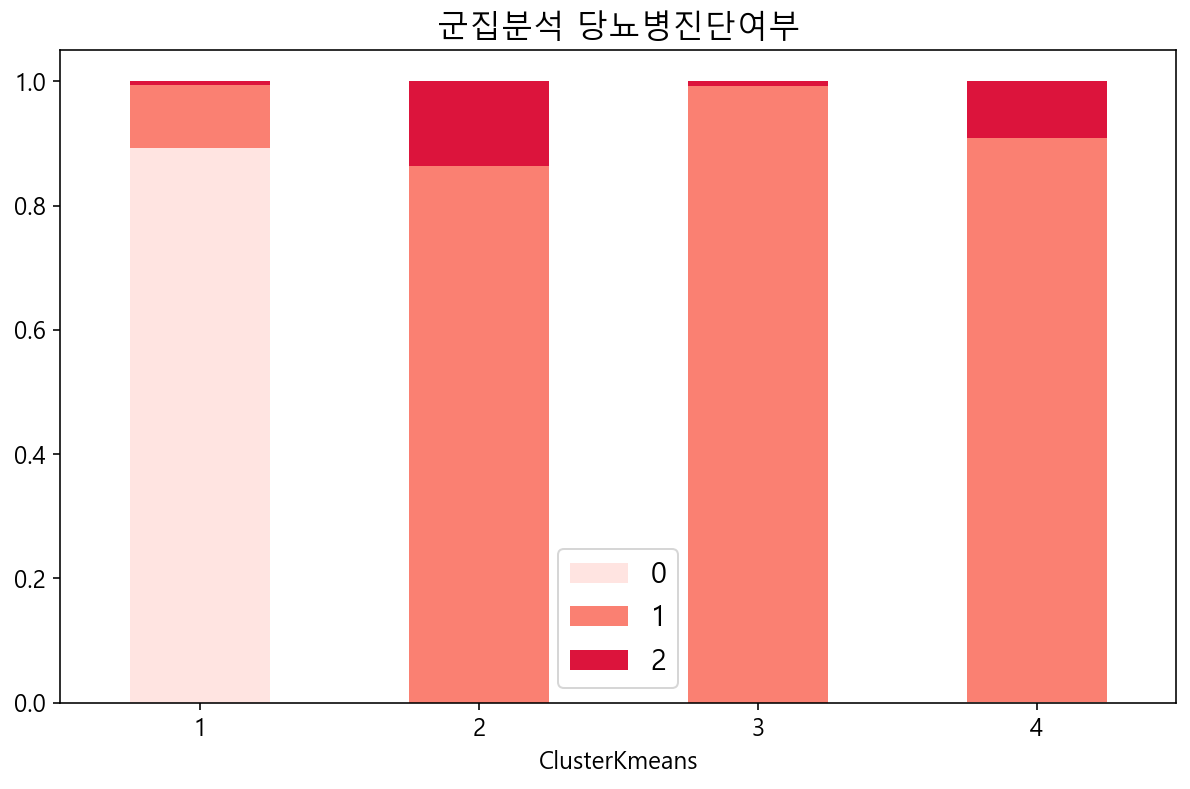

In [86]:
ct = pd.crosstab(df1['ClusterKmeans'], df1['당뇨병진단여부'])
cols = ct.columns.tolist()
cols = [ 0, 1, 2]
ct = ct[cols]

totals = []
for i in range(len(ct)):
    totals.append(sum(ct.iloc[i, :]))

cl = ct.columns.to_list()

color_list = ['MistyRose','Salmon','Crimson']

for i in range(len(cl)):
    ct[cl[i]] = ct[cl[i]] / totals
    
fig = ct.plot.bar(stacked=True, figsize=(10,6), color=color_list)
plt.xticks(fontsize=12, rotation=360)
plt.yticks(fontsize=12)
plt.xlabel('ClusterKmeans', fontsize=12)
plt.title('군집분석 당뇨병진단여부', fontsize=16)
plt.legend(fontsize='x-large')
plt.show()

#### 2번 집단의 경우, 건강상태에 대해 부정적으로 평가할 뿐 아니라 실제로 건강상태가 나쁜 경우가 많다는 것을 확인할 수 있다.

##### 결혼상태
- 0: 동거
- 1: 모름
- 2: 별거
- 3: 사별
- 4: 응답거부
- 5: 이혼

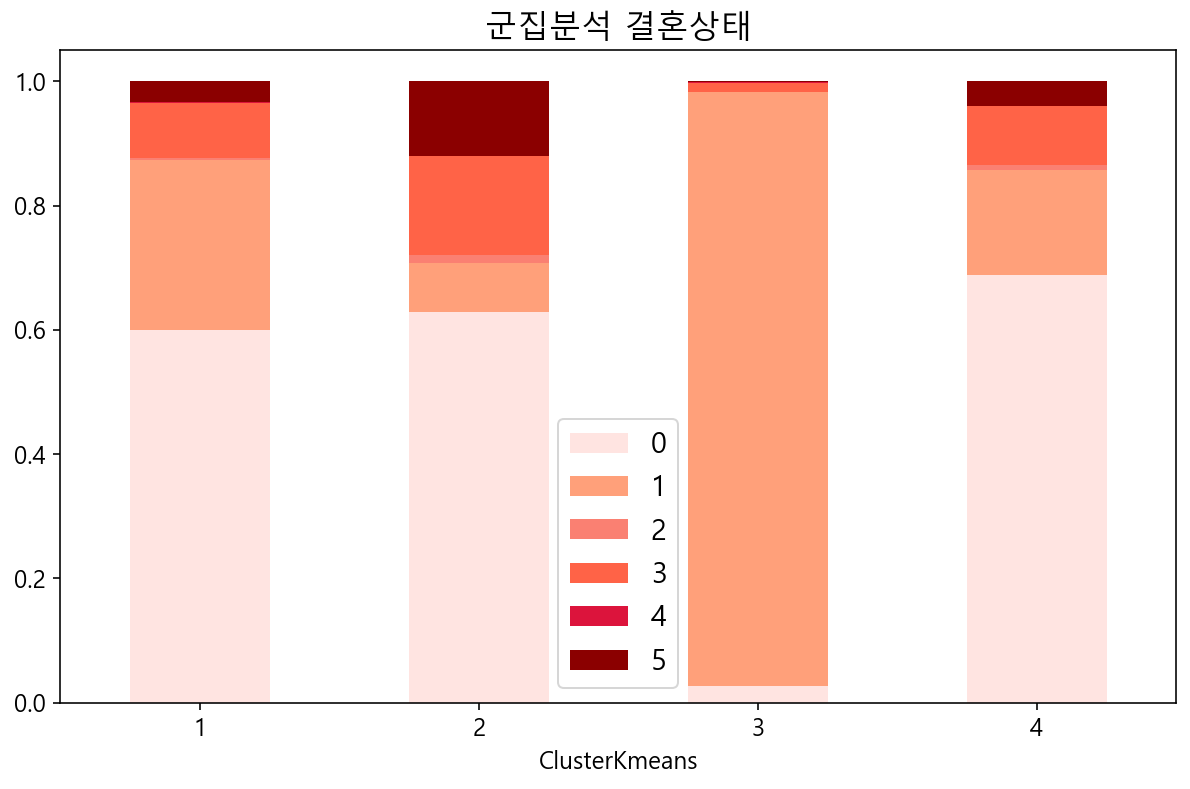

In [87]:
ct = pd.crosstab(df1['ClusterKmeans'], df1['결혼상태'])
cols = ct.columns.tolist()
cols = [ 0, 1, 2, 3, 4, 5]
ct = ct[cols]

totals = []
for i in range(len(ct)):
    totals.append(sum(ct.iloc[i, :]))

cl = ct.columns.to_list()

color_list = ['MistyRose','lightsalmon', 'Salmon','tomato', 'Crimson', 'darkred']

for i in range(len(cl)):
    ct[cl[i]] = ct[cl[i]] / totals
    
fig = ct.plot.bar(stacked=True, figsize=(10,6), color=color_list)
plt.xticks(fontsize=12, rotation=360)
plt.yticks(fontsize=12)
plt.xlabel('ClusterKmeans', fontsize=12)
plt.title('군집분석 결혼상태', fontsize=16)
plt.legend(fontsize='x-large')
plt.show()

#### 우울증 진단을 받은 집단의 경우, '사별', '이혼' 비율이 높게 나타난다.

#### 차원축소를 이용한 군집분석보다 차원축소를 하지 않은 군집분석으로 분류된 집단의 특성이 더 명확하게 드러난다.

## 4. 개선안 도출

In [88]:
df1_k = pd.pivot_table(df1, index = 'ClusterKmeans', values = ['age', '성별', '월평균가구총소득', 
                                                               '우울증진단여부', '하루평균수면시간'], aggfunc=np.mean)
df1_k

,age,성별,우울증진단여부,월평균가구총소득,하루평균수면시간
ClusterKmeans,,,,,
1,46.566449,0.484749,0.002179,364.167351,6.766586
2,56.820000,0.800000,3.000000,275.484132,6.684199
3,12.840663,0.475847,1.046143,431.099184,6.893146
4,51.013472,0.558342,1.994819,369.241650,6.745326


군집분석을 통해 우울증진단을 받은 집단의 성별, 연령, 경제력, 건강상태 특성을 확인할 수 있었다.

분석결과, 우울증진단을 받은 집단의 경우 여성의 비율이 훨씬 높았고, 연령대가 높다. 또한, 실업자 비율이 가장 높으며 집단의 월평균가구총소득 평균이 다른 집단에 비하여 낮다. 건강 관련 변수를 확인했을 때, 자신의 건강을 부정적으로 평가하는 비율이 높을뿐 아니라 고혈압과 당뇨병 진단을 받은 비율이 높은 것으로 보아 실제 건강상태도 좋지 않은 경우가 많음을 알 수 있다.

1) 우울증 진단을 받은 집단의 우울증 치료 여부를 확인해본 결과, 우울증치료 경험이 있다고 응답한 비율보다 없다고 응답한 비율이 더 높았다. 또한, 1년간 정신문제 상담을 받았다고 응답한 비율보다 받지 않았다고 응답한 비율이 더 높았다. 이는 우울증 진단을 받았음에도 불구하고 사후 조치를 취하지 않는 경우가 더 많다는 것을 의미한다. 소득이 낮고 실업자비율이 높다는 집단의 특성을 고려해볼 때, 정신과 치료 비용에 대한 문제도 작용했을 것이라 추측할 수 있다. 따라서 우울증 환자 중 기초생활수급자나 실업자에 대한 정신과 치료비 지원이 필요하다고 판단된다.

2) 우울증 환자 중, 고혈압, 당뇨병 등의 만성질환을 앓고 있는 비율이 높게 나타난다. 또한, 자신의 건강상태를 부정적으로 평가하는 비율도 높게 나타난다. 이를 종합해보면, 만성질환을 앓고 있는 중장년층 환자의 건강에 대한 염려나 스트레스가 우울증 발병의 원인이 되었을 가능성을 추측해볼 수 있다. 따라서, 고혈압, 당뇨병 진단을 받은 중장년층 환자들에게 정신 건강을 함께 관리할 수 있도록 돕는 의료 서비스를 제공하는 방안을 생각해볼 수 있다.

3) 우울증진단을 받은 집단의 경우, 다른 집단에 비하여 연령대가 높고, '사별', '이혼' 비율이 높게 나타난다. 외로움이 우울증 발병의 주된 원인으로 판단되며, 따라서 자원봉사, 종교활동, 평생교육 등 다양한 사회활동에 적극적으로 참여할 수 있도록 유도하는 프로그램이 필요하다고 판단된다.